In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

# Load data
link ='https://docs.google.com/spreadsheets/d/e/2PACX-1vTCva2ZOJF27yFWCYgLy4cSTmcEHxOxOtuz7v1EO0QFb61cLc96shXmiiPMtk45uQ/pub?gid=570077591&single=true&output=csv'

df = pd.read_csv(link)

df.head()


Age  Gender Eduaction Level Stream Medium Of School  10th Pass Out Year  \
0   14    Male     High School    NaN          Marathi                 NaN   
1   14  Female     High School    NaN          Marathi                 NaN   
2   13  Female     High School    NaN          Marathi                 NaN   
3   15    Male     High School    NaN          Marathi                 NaN   
4   14  Female     High School    NaN          Marathi                 NaN   

   10th Marks  12th Marks  Graduation Marks  Last Examination Marks  ... Y_16  \
0         NaN         NaN               NaN                    65.0  ...    1   
1         NaN         NaN               NaN                    72.0  ...    1   
2         NaN         NaN               NaN                    65.0  ...    0   
3         NaN         NaN               NaN                    77.0  ...    1   
4         NaN         NaN               NaN                    71.0  ...    1   

  Y_17 Y_18 Y_19 Y_20  Y_21 Y_22 Y_23 Y_24 Y_25  
0    1    1    1    1     0    0    0    0    0  
1    1    1    1    1     1    1    0    0    0  
2    0    0    0    0     0    0    0    0    0  
3    1    0    0    0     0    0    0    0    0  
4    1    1    0    0     0    0    0    0    0  

[5 rows x 115 columns]

In [ ]:
# Filter for "Junior college"
df = df[df['Eduaction Level'] == 'Under Graduation']
df.head()

Age  Gender   Eduaction Level   Stream Meduim Of School  Self Esteem_1  \
79   21    Male  Under Graduation  Science          English              1   
80   20    Male  Under Graduation  Science          Marathi              4   
81   18  Female  Under Graduation  Science          English              1   
82   18    Male  Under Graduation  Science     Semi English              2   
83   18    Male  Under Graduation  Science          English              3   

    Self Esteem_2  Self Esteem_3  Self Esteem_4  Self Esteem_Total  ...  \
79              2              3              1                  7  ...   
80              4              1              1                 10  ...   
81              1              1              1                  4  ...   
82              2              3              2                  9  ...   
83              3              1              2                  9  ...   

    Education_3  Education_4  Education_Total  BSMAS1  BSMAS2  BSMAS3  BSMAS4  \
79            4            1               15       1       3       1       3   
80            2            5               17       1       2       3       1   
81            4            5               19       1       3       1       1   
82            1            4               11       4       4       1       3   
83            5            3               18       3       3       3       4   

    BSMAS5  BSMAS6  BSMAS_Total  
79       1       1           10  
80       3       1           11  
81       2       1            9  
82       4       4           20  
83       5       1           19  

[5 rows x 70 columns]

In [ ]:
# Define dependent and independent variables
dependent_var = ['BSMAS_Total']

independent_vars = [
    'Self Esteem_Total', 'Depression_Total', 'Anxiety_Total', 'FOMO_Total',
    'Social Comparison_Total', 'Emotional Regulation_Total', 'Attachment Style_Total',
    'Family Structure_Total', 'Social Network_Total', 'Peer Group_Total',
    'Cultural Background_Total', 'Education_Total'
]

# Step 1: Descriptive statistics for dependent and independent variables
print("Descriptive Statistics:")
print(df[dependent_var + independent_vars].describe())

# Step 2: Normalize scores to range from 4 to 20
def normalize_score(score, min_val, max_val):
    normalized = 4 + (score - min_val) * (20 - 4) / (max_val - min_val)
    return normalized

# Normalize dependent variable
df['Normalized_BSMAS'] = normalize_score(df[dependent_var], df[dependent_var].min(), df[dependent_var].max())

# Normalize independent variables
for var in independent_vars:
    df[f'Normalized_{var}'] = normalize_score(df[var], df[var].min(), df[var].max())

# Step 3: Descriptive statistics for normalized scores
print("\nDescriptive Statistics for Normalized Scores:")
normalized_vars = ['Normalized_BSMAS'] + [f'Normalized_{var}' for var in independent_vars]
print(df[normalized_vars].describe())


Descriptive Statistics:
       BSMAS_Total  Self Esteem_Total  Depression_Total  Anxiety_Total  \
count   179.000000         179.000000        179.000000     179.000000   
mean     14.100559           7.743017         10.994413      16.905028   
std       4.649628           2.574921          3.497185       4.187586   
min       6.000000           4.000000          5.000000       8.000000   
25%      10.000000           6.000000          9.000000      14.000000   
50%      14.000000           8.000000         11.000000      17.000000   
75%      18.000000           9.000000         13.000000      20.000000   
max      27.000000          15.000000         21.000000      28.000000   

       FOMO_Total  Social Comparison_Total  Emotional Regulation_Total  \
count  179.000000               179.000000                  179.000000   
mean    10.888268                 8.290503                    7.625698   
std      2.143406                 2.330663                    2.280747   
min      6.00

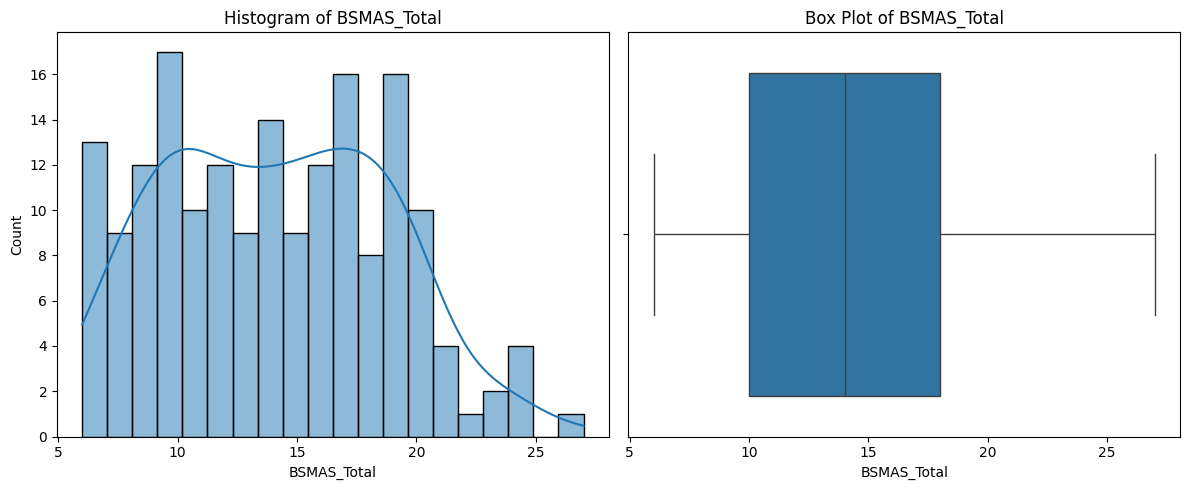

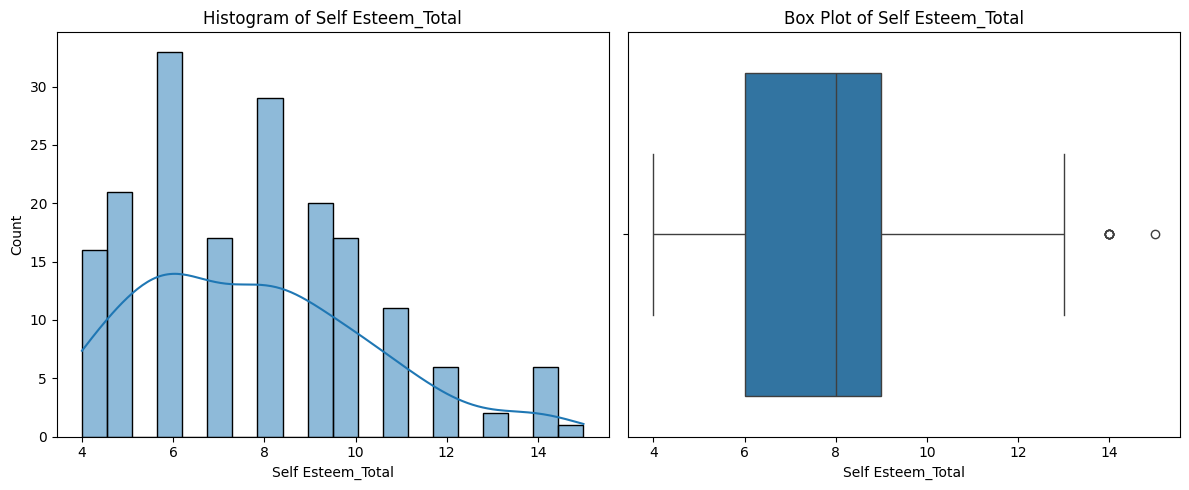

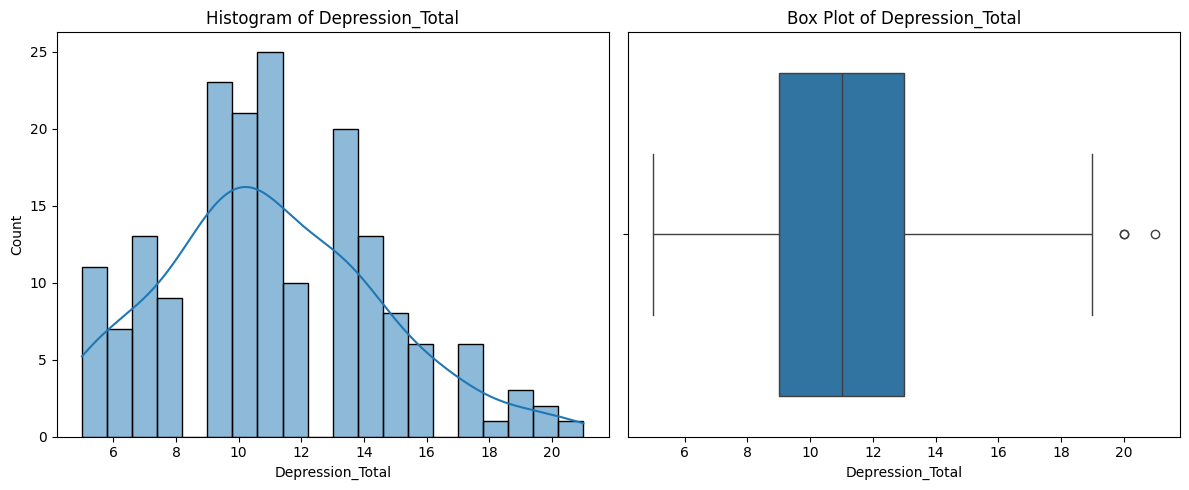

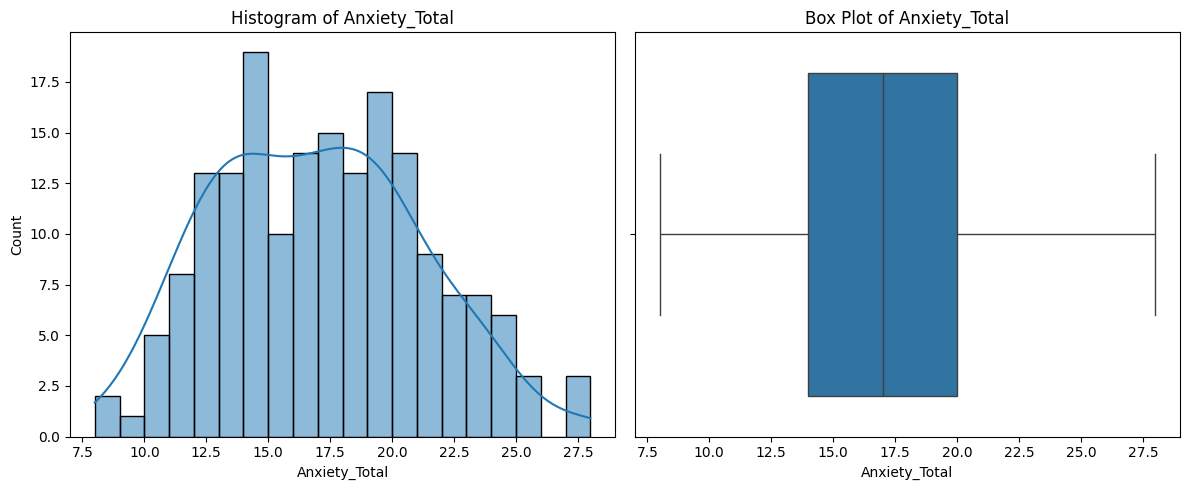

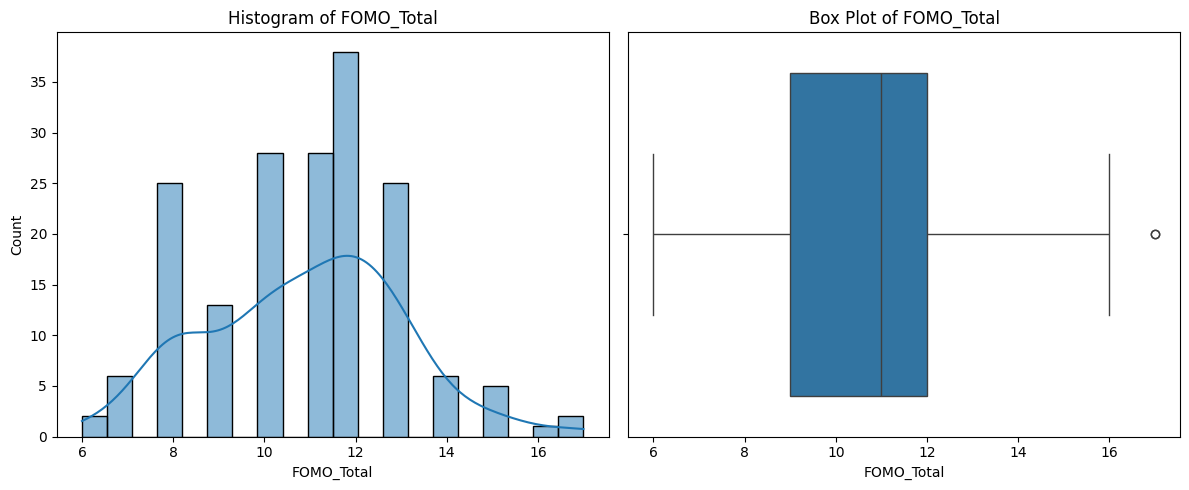

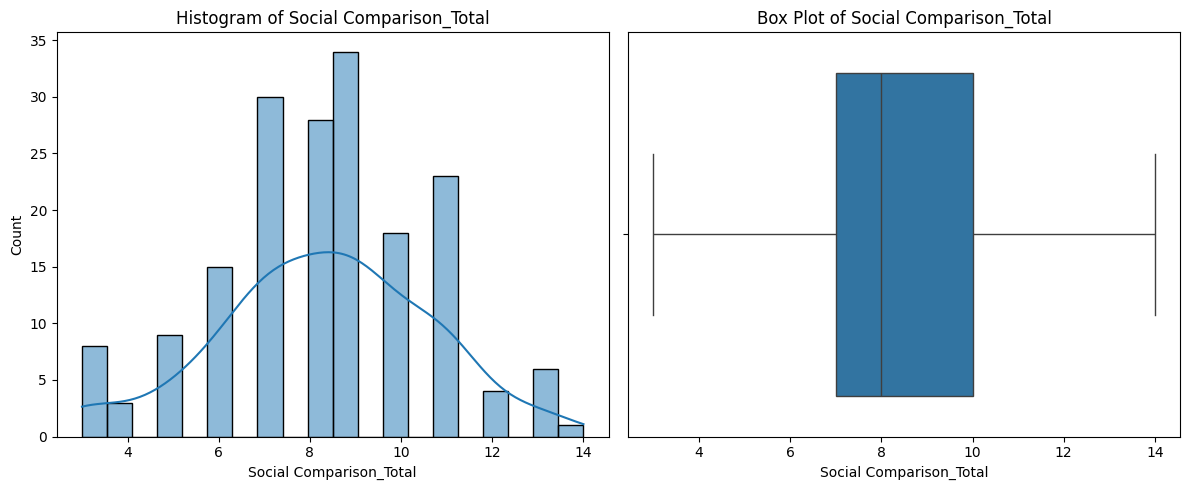

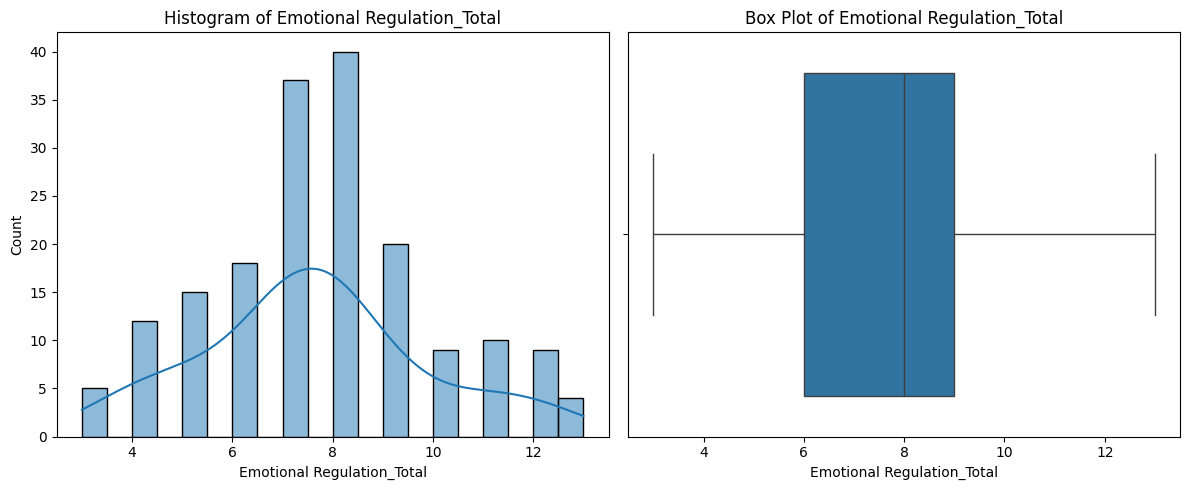

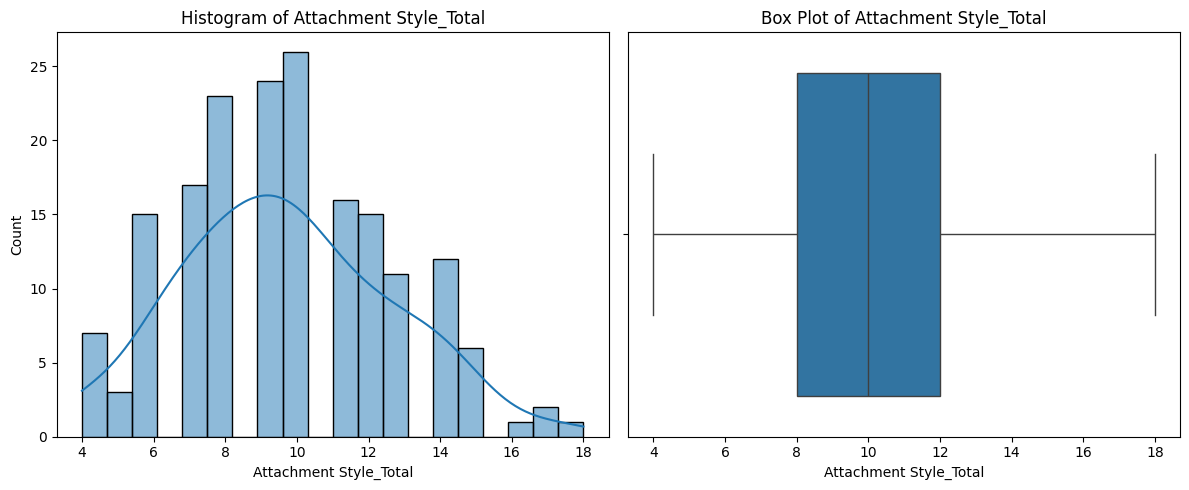

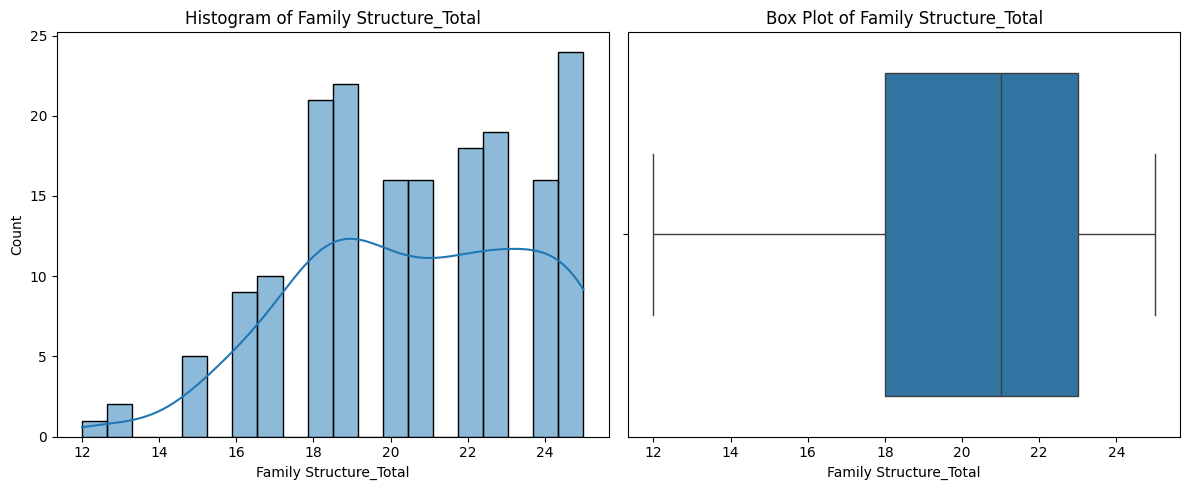

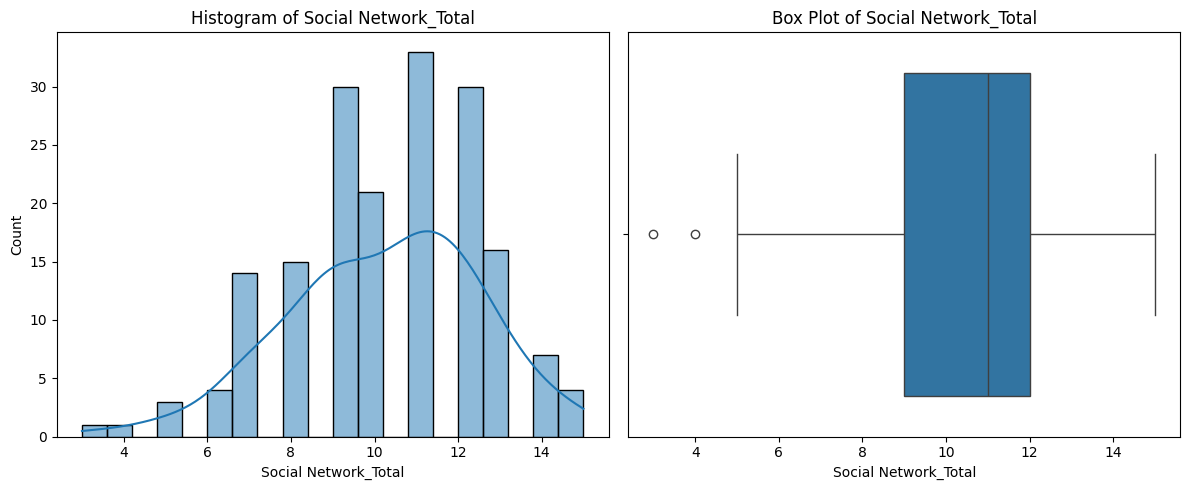

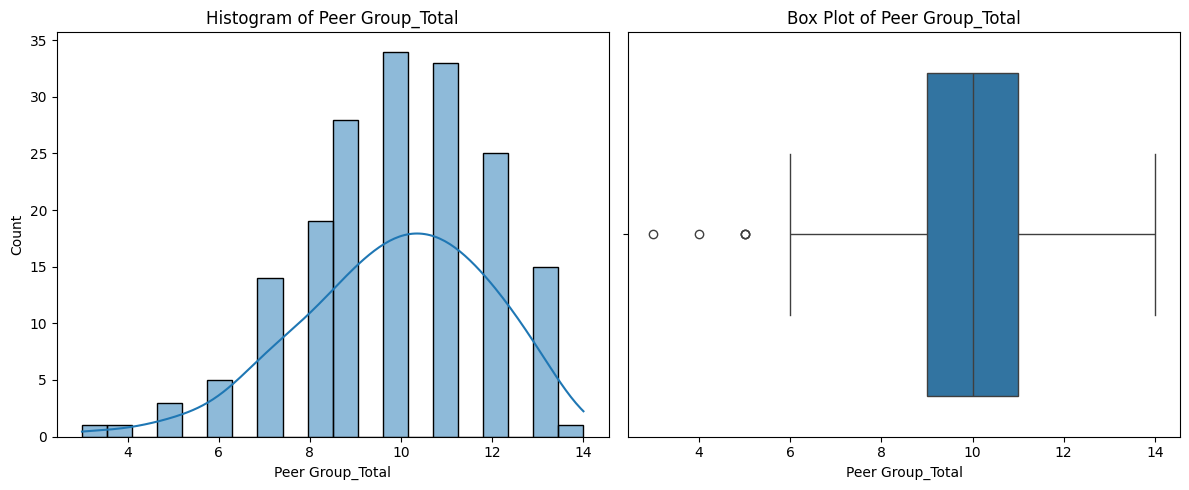

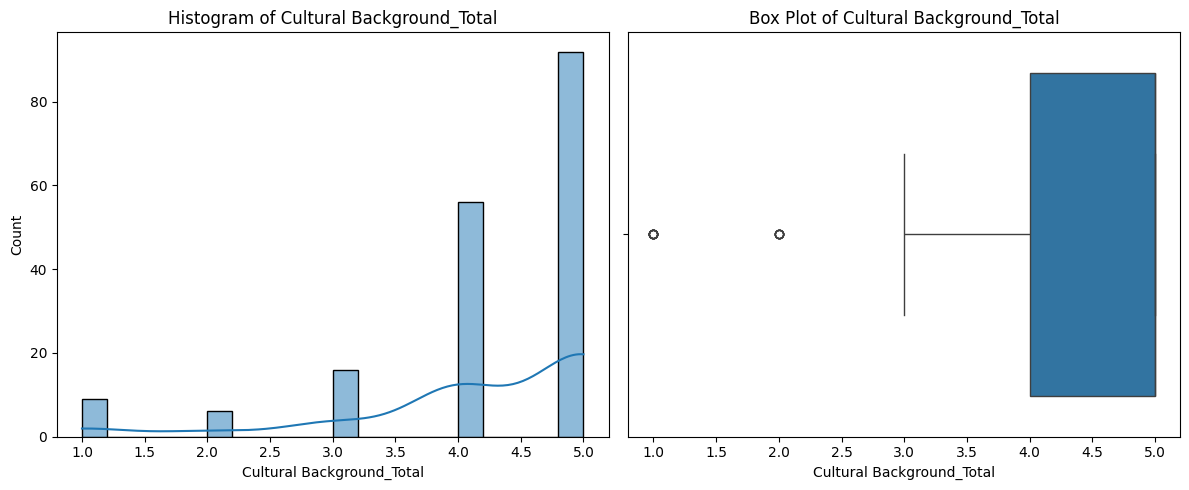

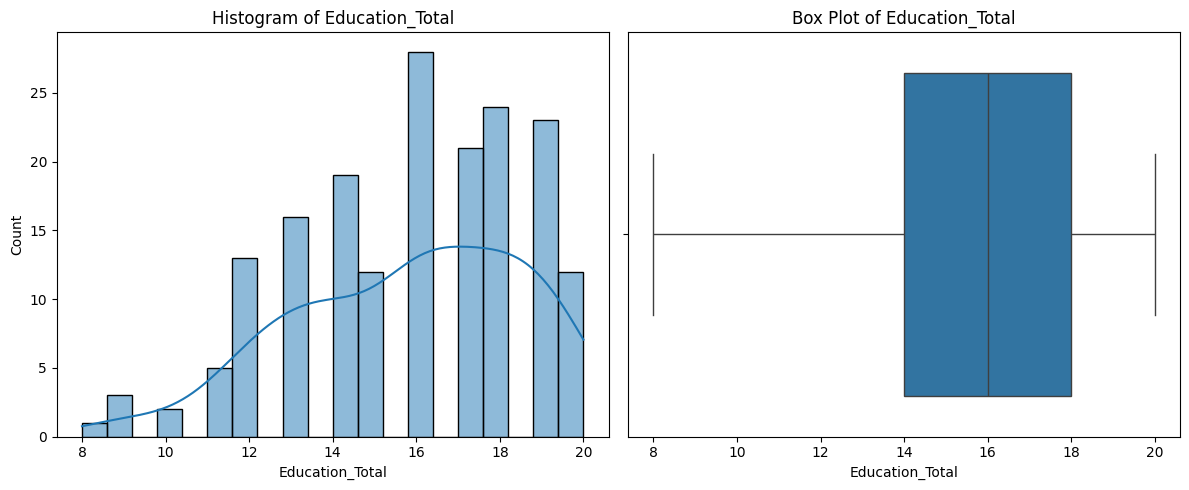

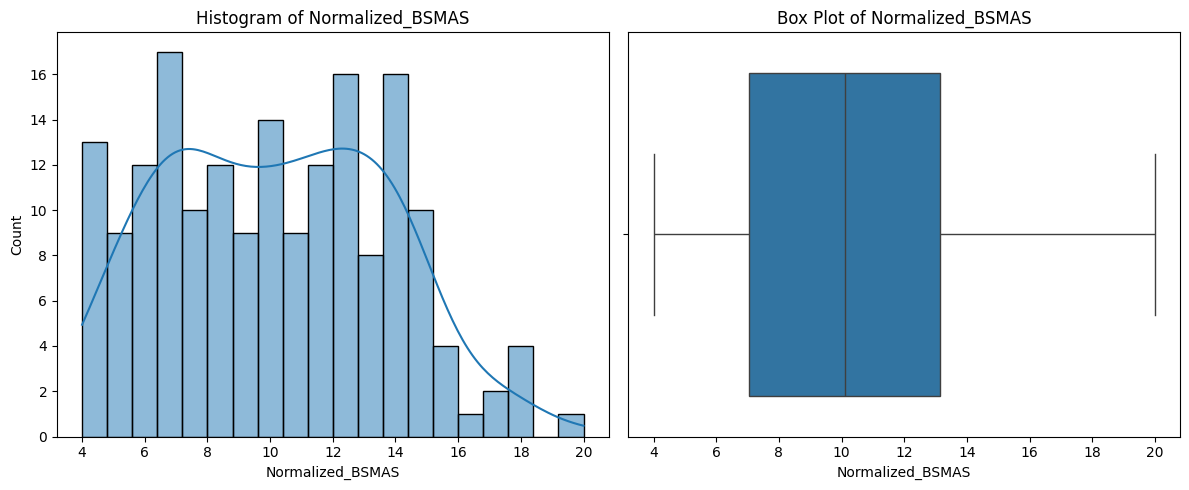

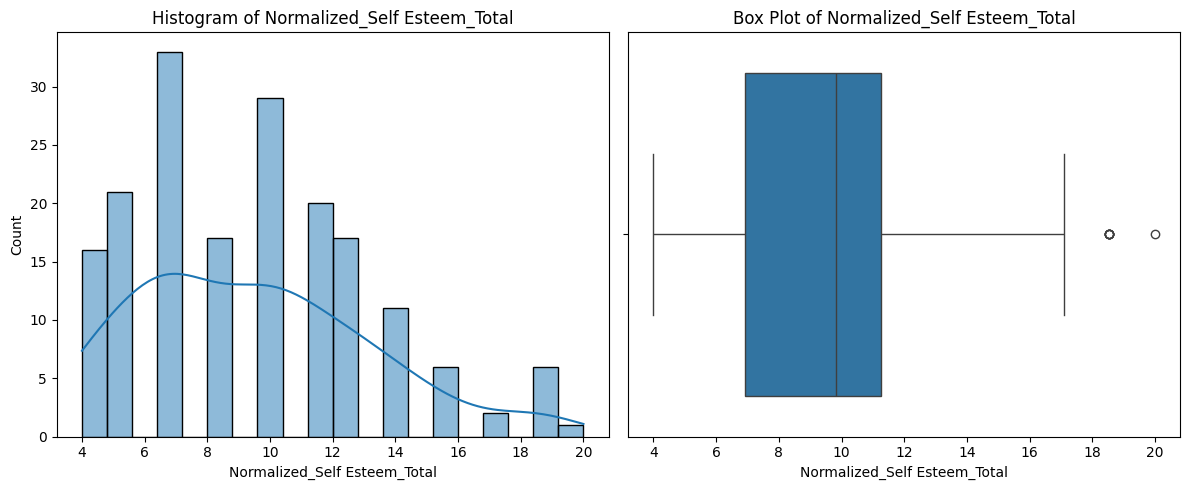

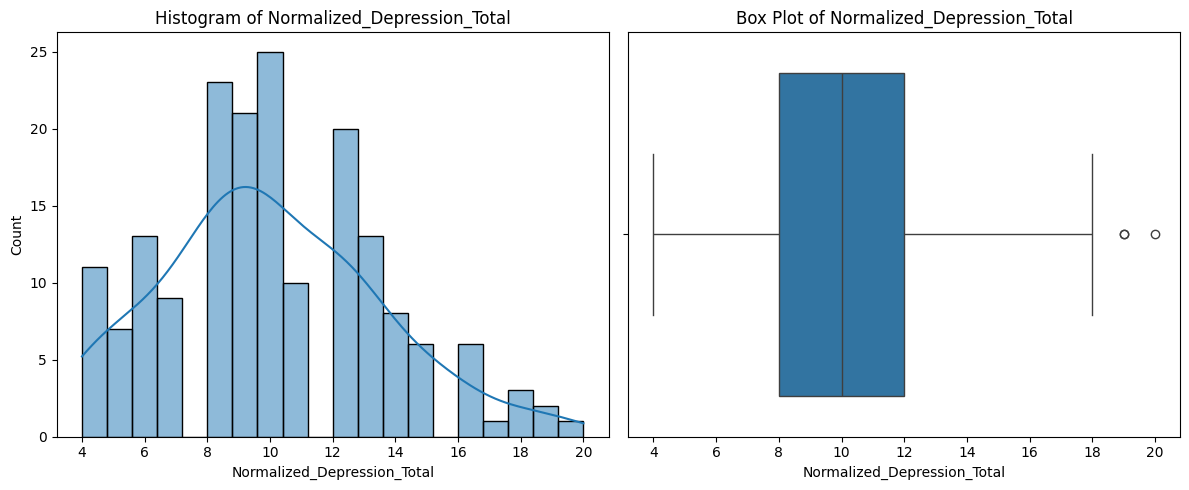

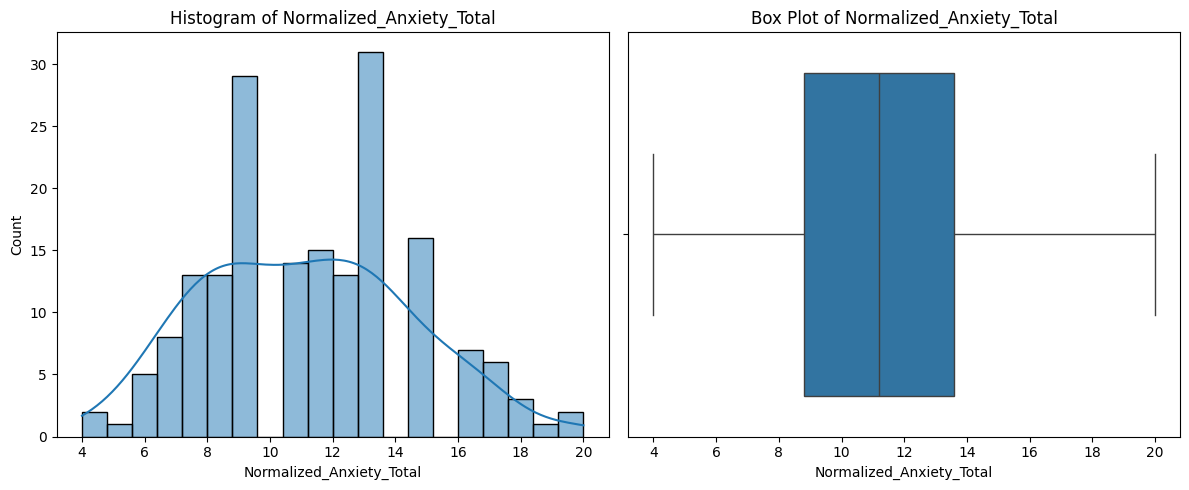

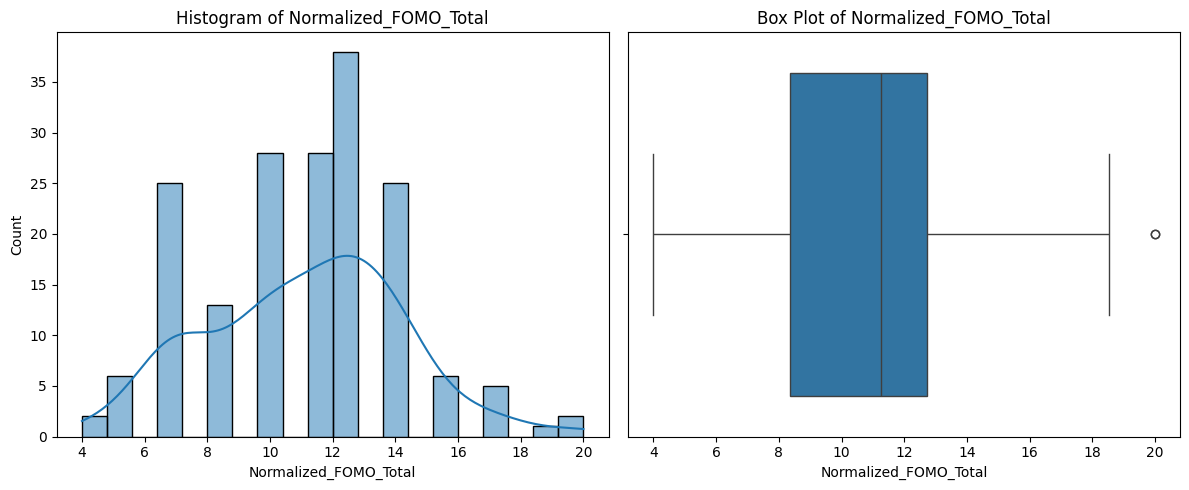

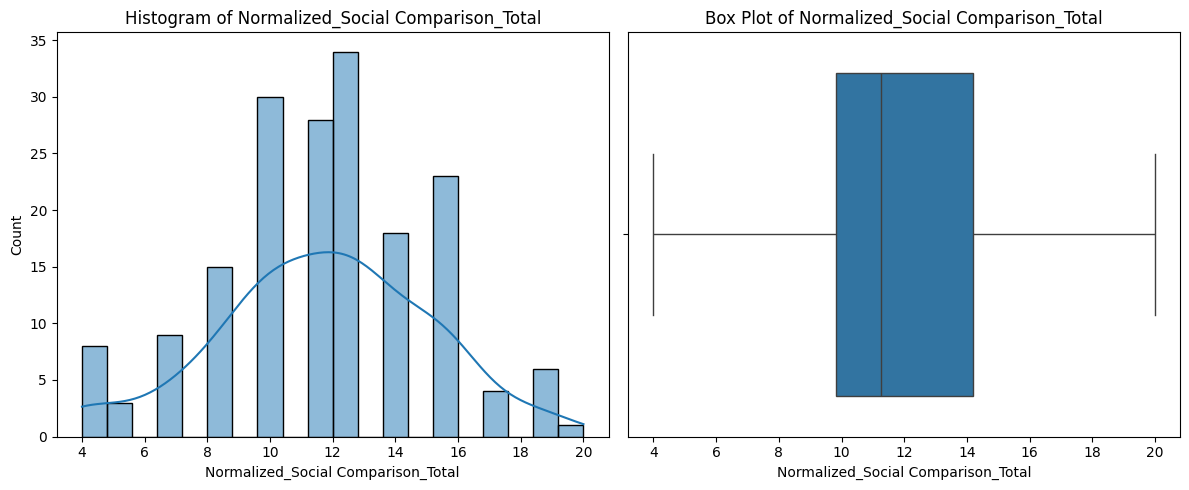

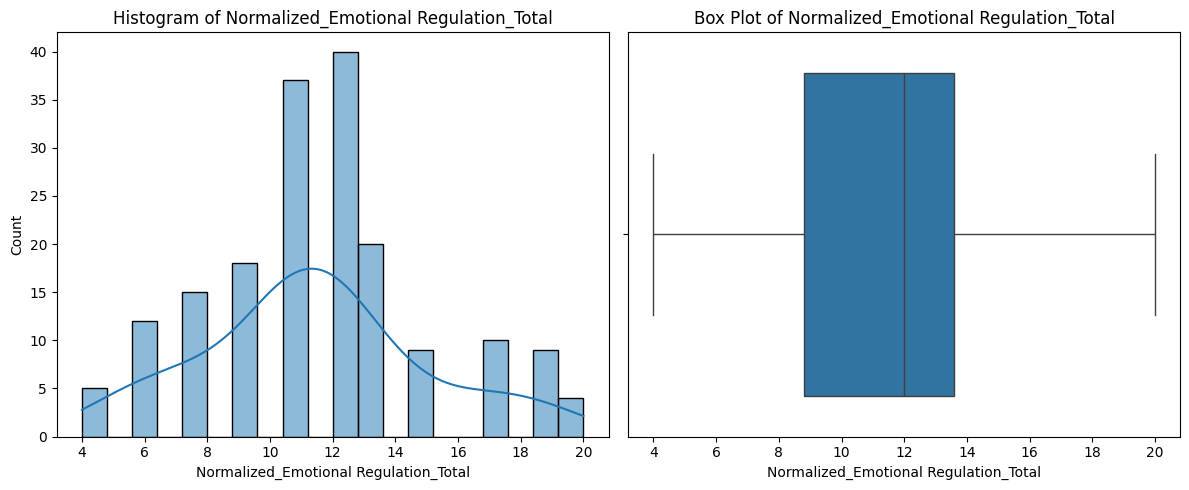

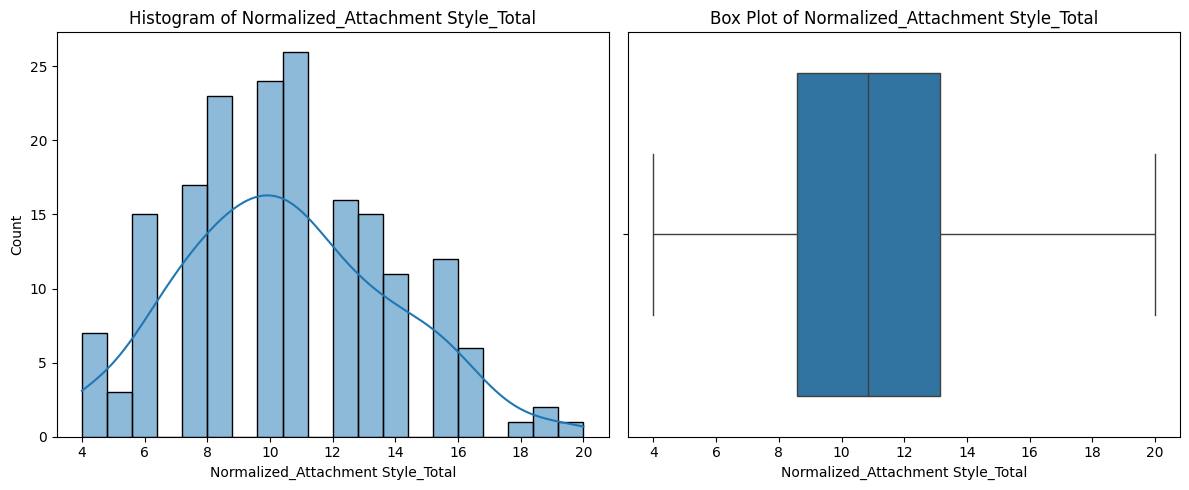

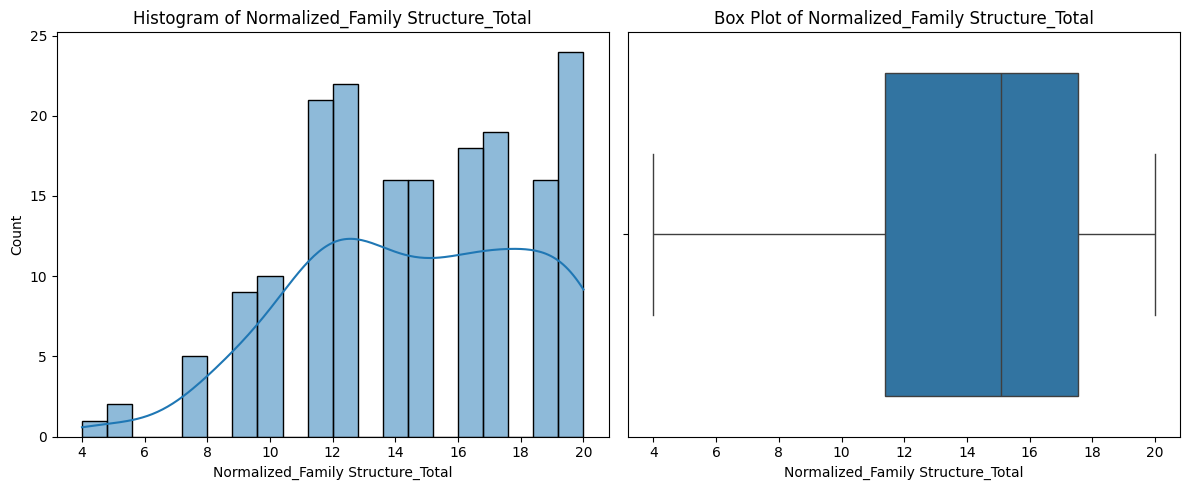

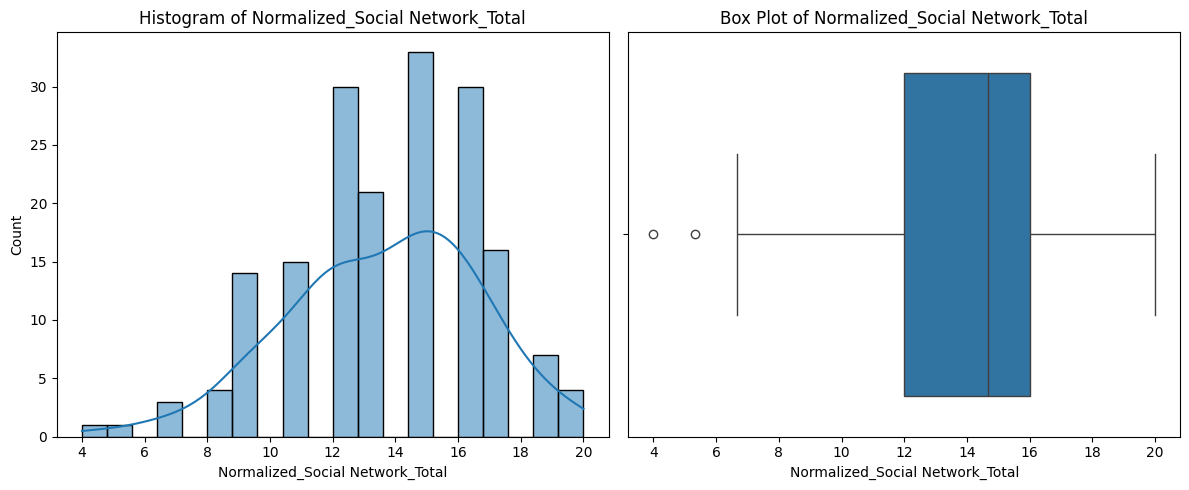

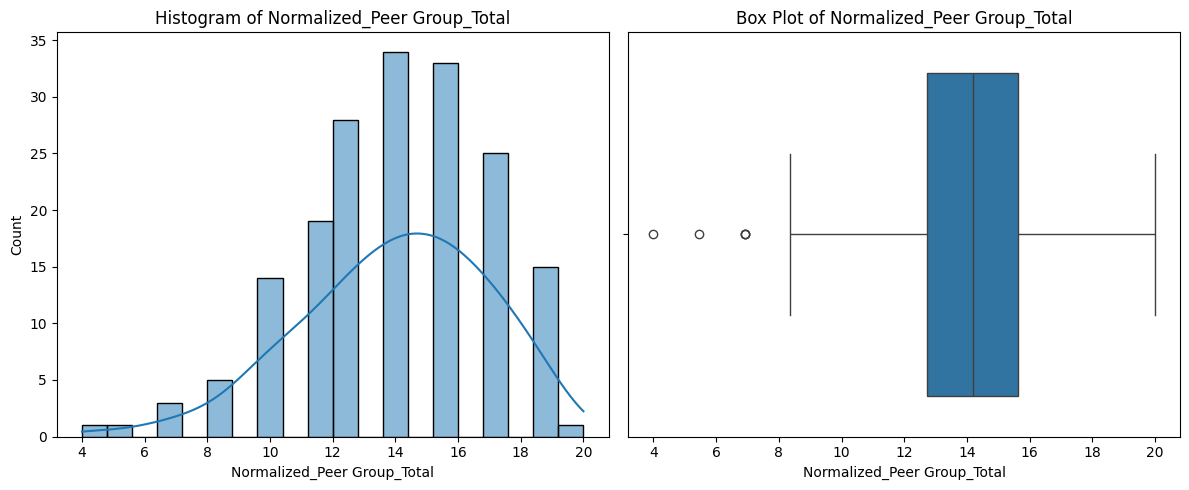

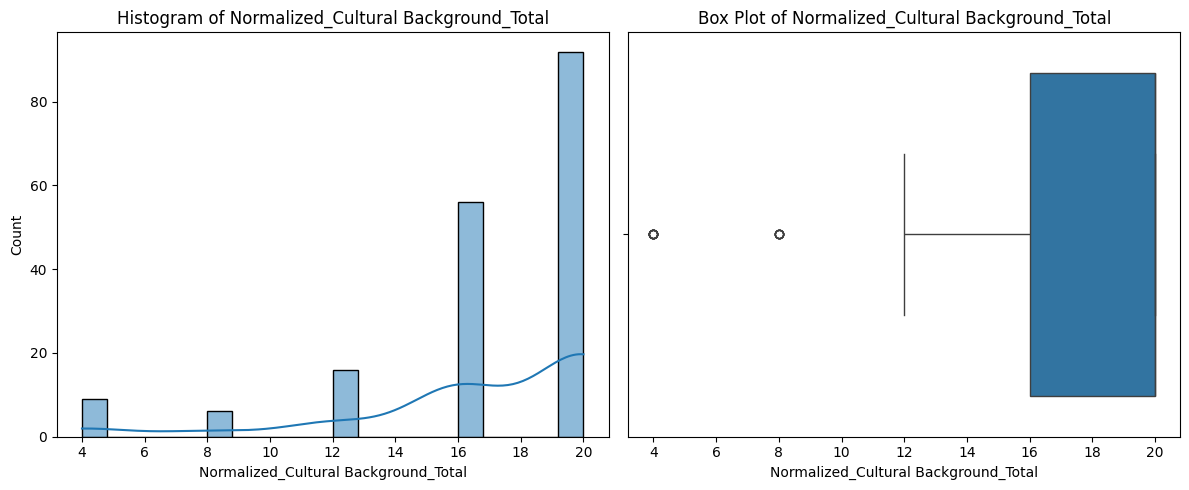

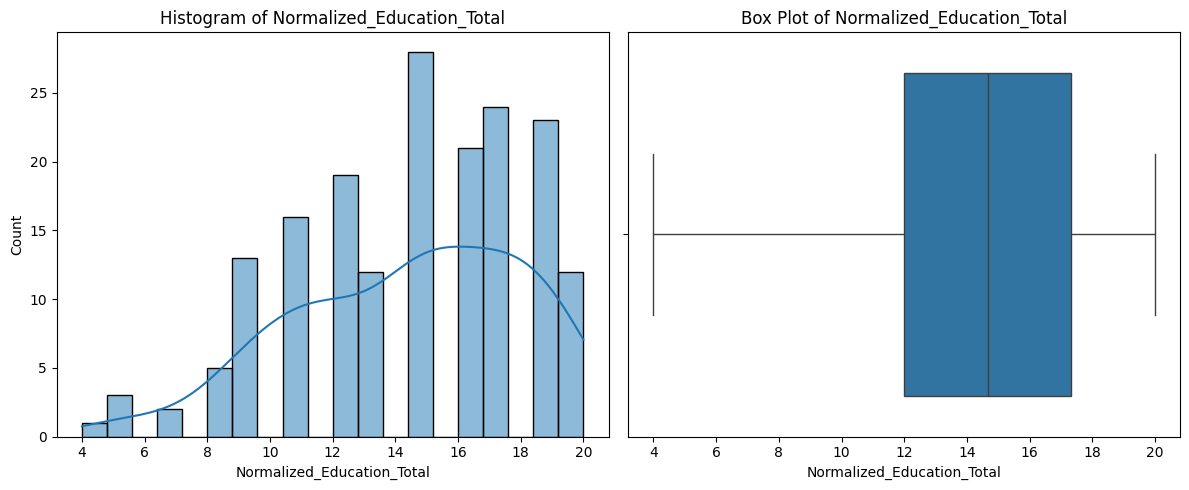

In [ ]:
# Step 4: Plot univariate histogram and box plots for original and normalized scores
for var in dependent_var + independent_vars:
    plt.figure(figsize=(12, 5))

    # Histogram for original scores
    plt.subplot(1, 2, 1)
    sns.histplot(df[var], bins=20, kde=True)
    plt.title(f'Histogram of {var}')

    # Box plot for original scores
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[var])
    plt.title(f'Box Plot of {var}')

    plt.tight_layout()
    plt.show()

for var in normalized_vars:
    plt.figure(figsize=(12, 5))

    # Histogram for normalized scores
    plt.subplot(1, 2, 1)
    sns.histplot(df[var], bins=20, kde=True)
    plt.title(f'Histogram of {var}')

    # Box plot for normalized scores
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[var])
    plt.title(f'Box Plot of {var}')

    plt.tight_layout()
    plt.show()

In [ ]:
# Drop any rows with missing values in the relevant columns to avoid errors in correlation
df_clean = df[dependent_var + independent_vars].dropna()

# Initialize results list
results = []

# Loop over each independent variable to calculate correlations
for var in independent_vars:
    # Karl Pearson Correlation
    pearson_corr, pearson_pval = stats.pearsonr(df_clean[dependent_var[0]], df_clean[var])

    # Spearman Rank Correlation
    spearman_corr, spearman_pval = stats.spearmanr(df_clean[dependent_var[0]], df_clean[var])

    # Kendall's Tau Correlation
    kendall_corr, kendall_pval = stats.kendalltau(df_clean[dependent_var[0]], df_clean[var])

    # Append results to the list
    results.append({
        'Independent Var': var,
        'KarlPearson': pearson_corr,
        'Pearson_pval': pearson_pval,
        'Spearman': spearman_corr,
        'Spearman_pval': spearman_pval,
        'KendallTau': kendall_corr,
        'Kendall_pval': kendall_pval
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display the results
results_df.round(4)


Independent Var  KarlPearson  Pearson_pval  Spearman  \
0            Self Esteem_Total       0.1580        0.0347    0.1575   
1             Depression_Total       0.2961        0.0001    0.2820   
2                Anxiety_Total       0.1953        0.0088    0.2058   
3                   FOMO_Total       0.0062        0.9343    0.0117   
4      Social Comparison_Total       0.0051        0.9463   -0.0572   
5   Emotional Regulation_Total       0.1275        0.0889    0.1118   
6       Attachment Style_Total       0.2046        0.0060    0.1949   
7       Family Structure_Total      -0.2387        0.0013   -0.2554   
8         Social Network_Total      -0.0423        0.5743   -0.0558   
9             Peer Group_Total       0.0049        0.9476   -0.0392   
10   Cultural Background_Total       0.0003        0.9967   -0.0244   
11             Education_Total      -0.0131        0.8617    0.0071   

    Spearman_pval  KendallTau  Kendall_pval  
0          0.0352      0.1173        0.0313  
1          0.0001      0.2062        0.0001  
2          0.0057      0.1462        0.0061  
3          0.8770      0.0098        0.8583  
4          0.4471     -0.0496        0.3650  
5          0.1364      0.0823        0.1332  
6          0.0089      0.1428        0.0082  
7          0.0006     -0.1845        0.0006  
8          0.4583     -0.0413        0.4500  
9          0.6028     -0.0377        0.4929  
10         0.7462     -0.0203        0.7327  
11         0.9251      0.0084        0.8769

In [ ]:
# Step 5: Convert scores to intervals for BSMAS_Total
def categorize_scores(score):
    if score < df[dependent_var[0]].quantile(1/3):
        return 'Low'
    elif score < df[dependent_var[0]].quantile(2/3):
        return 'Medium'
    else:
        return 'High'

# Create an interval column for BSMAS_Total
df['BSMAS_Interval'] = df[dependent_var[0]].apply(categorize_scores)

# Step 6: Initialize results list for Chi-Square tests
chi_square_results = []

# Loop over each independent variable to calculate Chi-Square
for var in independent_vars:
    # Convert independent variable to intervals
    df[var + '_Interval'] = pd.cut(df[var], bins=3, labels=['Low', 'Medium', 'High'])

    # Create cross-tabulation
    contingency_table = pd.crosstab(df['BSMAS_Interval'], df[var + '_Interval'])

    # Perform Chi-Square test
    chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

    # Determine significance
    significance = 'Significant' if p_val < 0.05 else 'Not Significant'

    # Append results
    chi_square_results.append({
        'Dependent Var': dependent_var[0],
        'Independent Var': var,
        'Chi2 Stat': chi2_stat,
        'P-Value': p_val,
        'Significance': significance
    })

# Convert results to DataFrame
chi_square_results_df = pd.DataFrame(chi_square_results)

# Display the results
print("\nChi-Square Test Results:")
chi_square_results_df



Chi-Square Test Results:


Dependent Var             Independent Var  Chi2 Stat   P-Value  \
0    BSMAS_Total           Self Esteem_Total   5.427309  0.246193   
1    BSMAS_Total            Depression_Total  11.303472  0.023357   
2    BSMAS_Total               Anxiety_Total   6.728599  0.150945   
3    BSMAS_Total                  FOMO_Total   0.318642  0.988579   
4    BSMAS_Total     Social Comparison_Total   5.916906  0.205440   
5    BSMAS_Total  Emotional Regulation_Total   3.573319  0.466818   
6    BSMAS_Total      Attachment Style_Total   9.970743  0.040923   
7    BSMAS_Total      Family Structure_Total   9.787761  0.044159   
8    BSMAS_Total        Social Network_Total  17.774783  0.001366   
9    BSMAS_Total            Peer Group_Total   8.263830  0.082378   
10   BSMAS_Total   Cultural Background_Total   4.112522  0.390992   
11   BSMAS_Total             Education_Total   8.673526  0.069798   

       Significance  
0   Not Significant  
1       Significant  
2   Not Significant  
3   Not Significant  
4   Not Significant  
5   Not Significant  
6       Significant  
7       Significant  
8       Significant  
9   Not Significant  
10  Not Significant  
11  Not Significant

In [ ]:
# Step 5: Convert scores to intervals for BSMAS_Total
def categorize_scores(score):
    if score < df[dependent_var].quantile(1/3):
        return 'Low'
    elif score < df[dependent_var].quantile(2/3):
        return 'Medium'
    else:
        return 'High'

# Define dependent and independent variables
dependent_var = 'BSMAS_Total'
independent_vars = [
    'Self Esteem_Total', 'Depression_Total', 'Anxiety_Total', 'FOMO_Total',
    'Social Comparison_Total', 'Emotional Regulation_Total', 'Attachment Style_Total',
    'Family Structure_Total', 'Social Network_Total', 'Peer Group_Total',
    'Cultural Background_Total', 'Education_Total'
]

# Create an interval column for BSMAS_Total
df['BSMAS_Interval'] = df[dependent_var].apply(categorize_scores)

# Step 6: Initialize results list for Chi-Square tests
chi_square_results = []

# Loop over each independent variable to calculate Chi-Square
for var in independent_vars:
    try:
        # Convert independent variable to intervals using qcut for equal-sized bins
        df[var + '_Interval'] = pd.qcut(df[var], q=3, labels=['Low', 'Medium', 'High'], duplicates='drop')

        # Create cross-tabulation
        contingency_table = pd.crosstab(df['BSMAS_Interval'], df[var + '_Interval'])

        # Perform Chi-Square test
        chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

        # Determine significance
        significance = 'Significant' if p_val < 0.05 else 'Not Significant'

        # Append results
        chi_square_results.append({
            'Dependent Var': dependent_var,
            'Independent Var': var,
            'Chi2 Stat': chi2_stat,
            'P-Value': p_val,
            'Significance': significance
        })
    except ValueError as e:
        print(f"Error processing {var}: {e}")

# Convert results to DataFrame
chi_square_results_df = pd.DataFrame(chi_square_results)

# Display the results
print("\nChi-Square Test Results:")
chi_square_results_df


Error processing Cultural Background_Total: Bin labels must be one fewer than the number of bin edges

Chi-Square Test Results:


Dependent Var             Independent Var  Chi2 Stat   P-Value  \
0    BSMAS_Total           Self Esteem_Total   4.252647  0.372892   
1    BSMAS_Total            Depression_Total  14.372008  0.006198   
2    BSMAS_Total               Anxiety_Total   6.316519  0.176725   
3    BSMAS_Total                  FOMO_Total   0.727427  0.947904   
4    BSMAS_Total     Social Comparison_Total   2.111606  0.715240   
5    BSMAS_Total  Emotional Regulation_Total   0.222528  0.994251   
6    BSMAS_Total      Attachment Style_Total  10.788659  0.029045   
7    BSMAS_Total      Family Structure_Total  14.328637  0.006317   
8    BSMAS_Total        Social Network_Total  10.944410  0.027196   
9    BSMAS_Total            Peer Group_Total   5.726625  0.220515   
10   BSMAS_Total             Education_Total   8.425297  0.077184   

       Significance  
0   Not Significant  
1       Significant  
2   Not Significant  
3   Not Significant  
4   Not Significant  
5   Not Significant  
6       Significant  
7       Significant  
8       Significant  
9   Not Significant  
10  Not Significant

<ipython-input-8-3e40d0276d36>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = model.pvalues[1]  # p-value for the slope (independent variable)


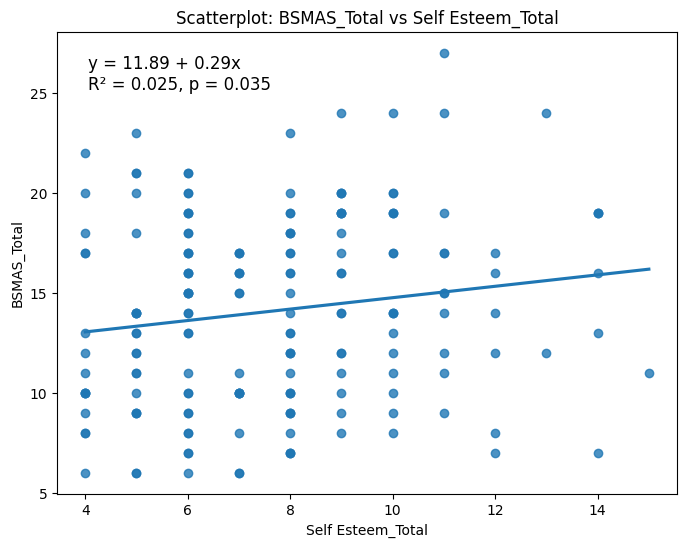

<ipython-input-8-3e40d0276d36>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = model.pvalues[1]  # p-value for the slope (independent variable)


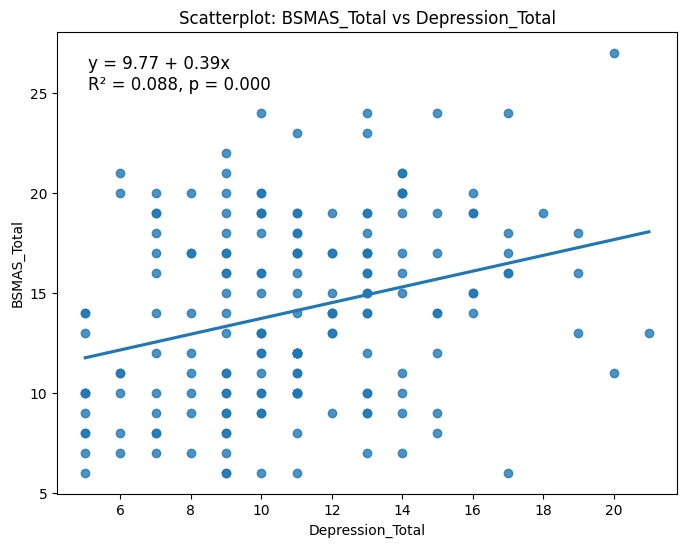

<ipython-input-8-3e40d0276d36>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = model.pvalues[1]  # p-value for the slope (independent variable)


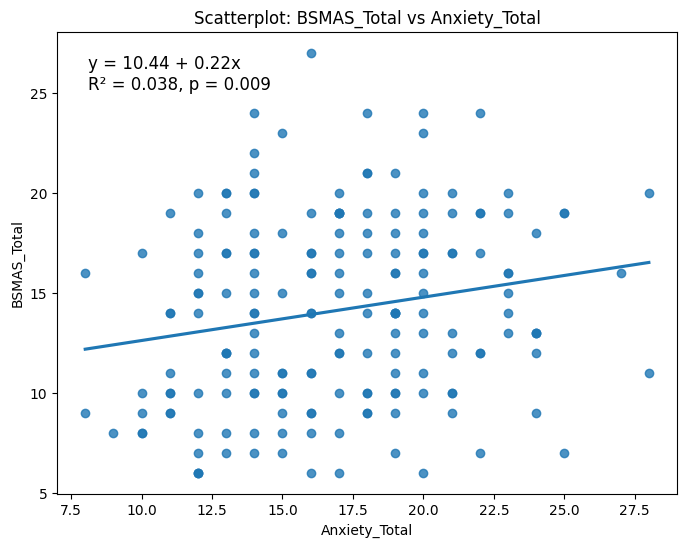

<ipython-input-8-3e40d0276d36>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = model.pvalues[1]  # p-value for the slope (independent variable)


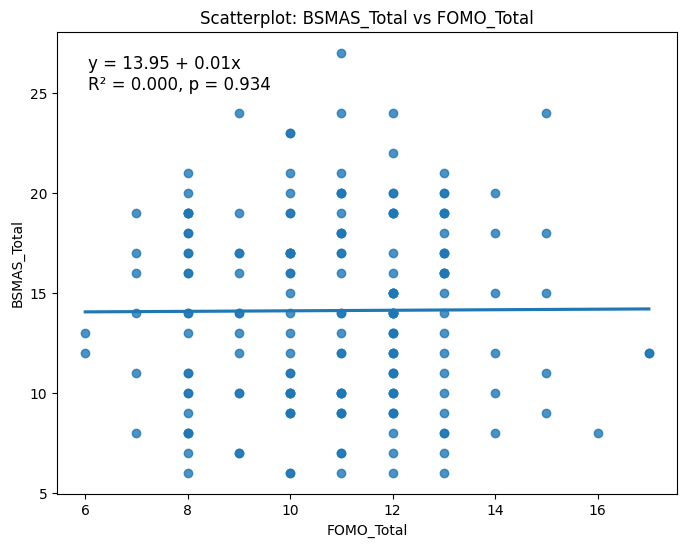

<ipython-input-8-3e40d0276d36>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = model.pvalues[1]  # p-value for the slope (independent variable)


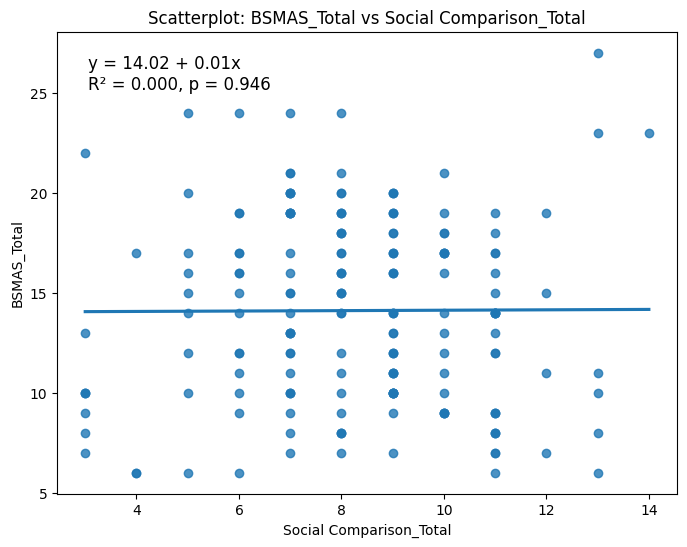

<ipython-input-8-3e40d0276d36>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = model.pvalues[1]  # p-value for the slope (independent variable)


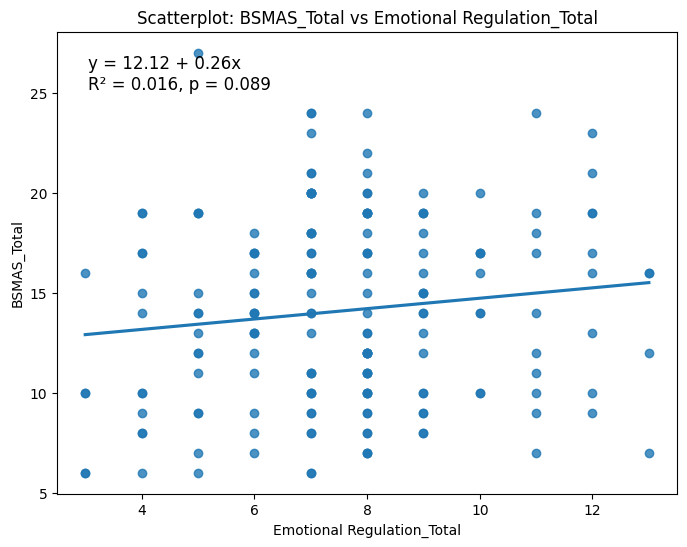

<ipython-input-8-3e40d0276d36>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = model.pvalues[1]  # p-value for the slope (independent variable)


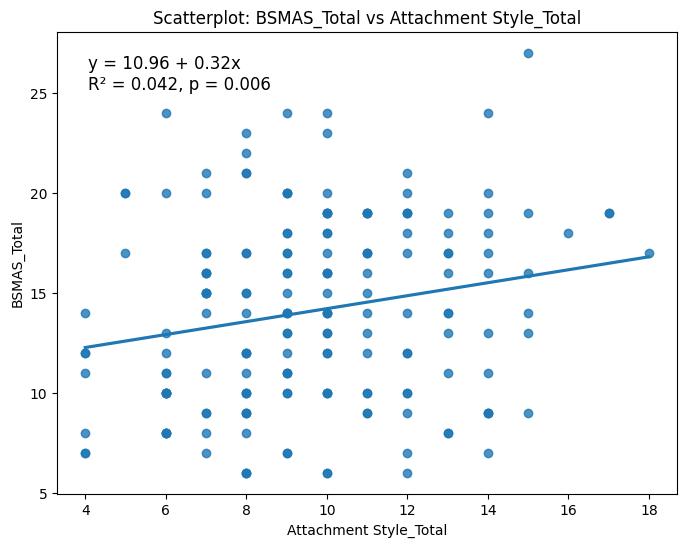

<ipython-input-8-3e40d0276d36>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = model.pvalues[1]  # p-value for the slope (independent variable)


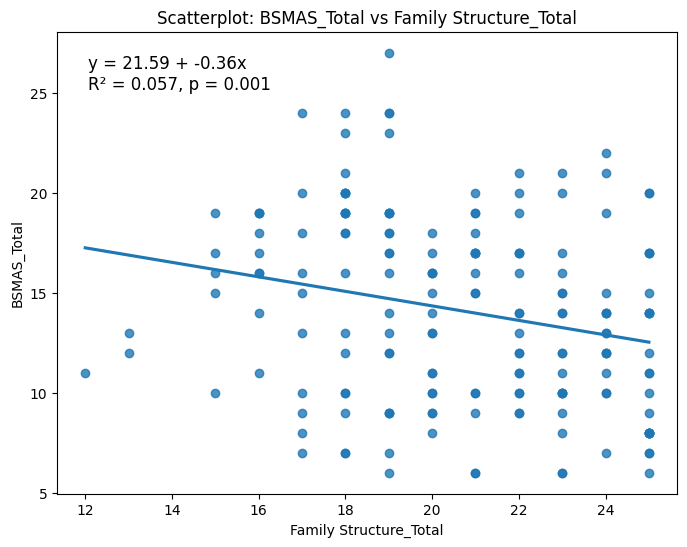

<ipython-input-8-3e40d0276d36>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = model.pvalues[1]  # p-value for the slope (independent variable)


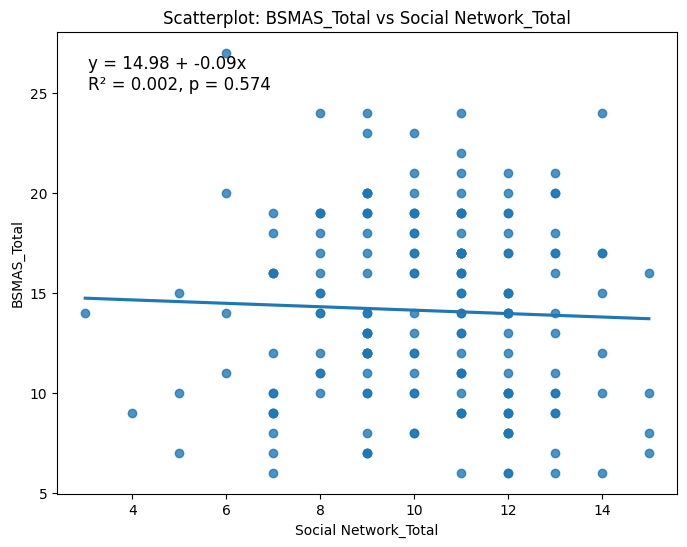

<ipython-input-8-3e40d0276d36>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = model.pvalues[1]  # p-value for the slope (independent variable)


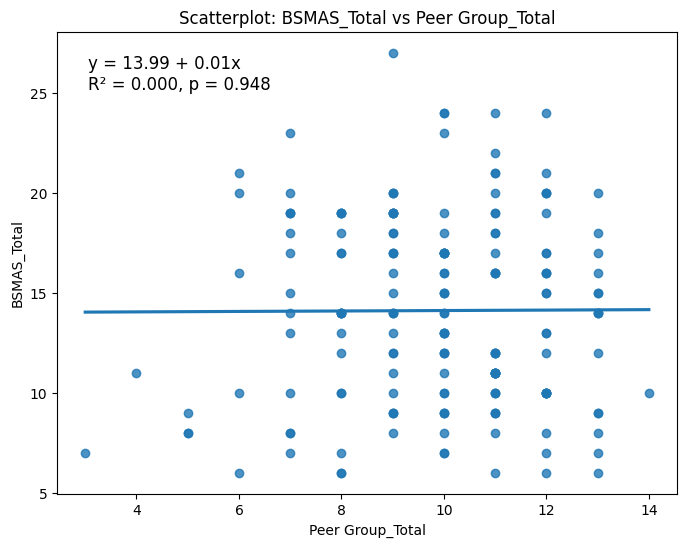

<ipython-input-8-3e40d0276d36>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = model.pvalues[1]  # p-value for the slope (independent variable)


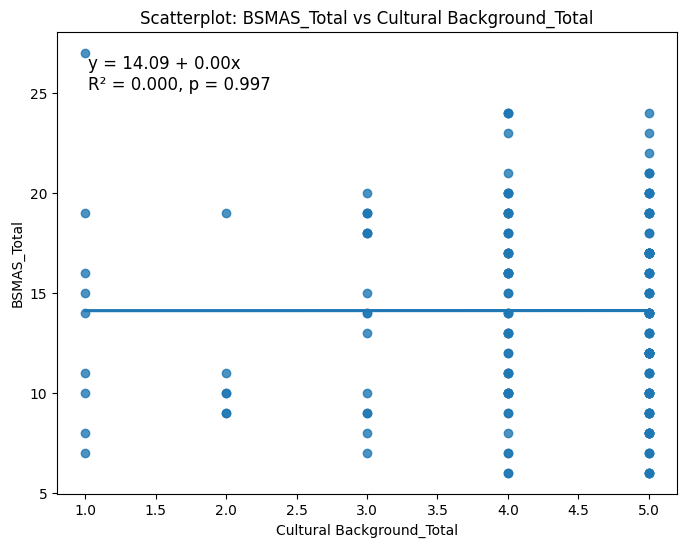

<ipython-input-8-3e40d0276d36>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = model.pvalues[1]  # p-value for the slope (independent variable)


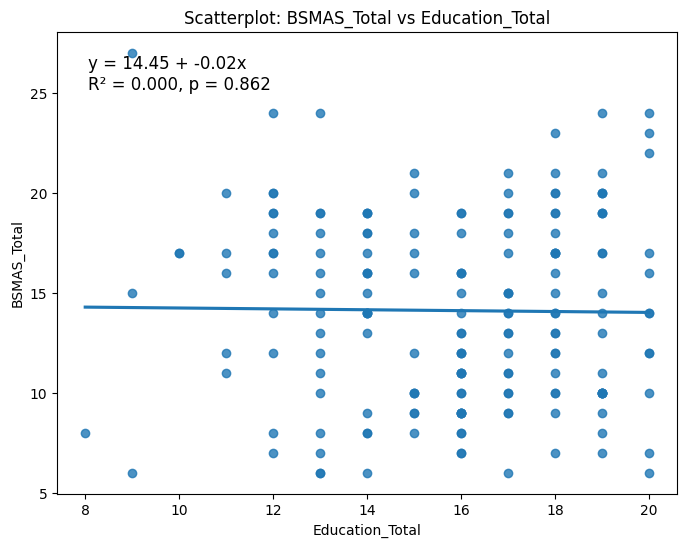

In [ ]:
# Function to calculate the regression line equation, R², and p-value
def get_regression_line_r2_pvalue(x, y):
    x = sm.add_constant(x)  # Add constant for intercept
    model = sm.OLS(y, x).fit()
    intercept, slope = model.params
    r2 = model.rsquared
    p_value = model.pvalues[1]  # p-value for the slope (independent variable)
    return intercept, slope, r2, p_value

# Define dependent and independent variables
dependent_var = 'BSMAS_Total'
independent_vars = [
    'Self Esteem_Total', 'Depression_Total', 'Anxiety_Total', 'FOMO_Total',
    'Social Comparison_Total', 'Emotional Regulation_Total', 'Attachment Style_Total',
    'Family Structure_Total', 'Social Network_Total', 'Peer Group_Total',
    'Cultural Background_Total', 'Education_Total'
]

# Loop over each independent variable and create individual scatterplots
for var in independent_vars:
    # Create a new figure for each independent variable
    plt.figure(figsize=(8, 6))

    # Scatterplot with regression line
    sns.regplot(x=df[var], y=df[dependent_var], ci=None)

    # Get regression equation, R², and p-value
    intercept, slope, r2, p_value = get_regression_line_r2_pvalue(df[var], df[dependent_var])

    # Add the equation, R², and p-value to the plot
    equation_text = f"y = {intercept:.2f} + {slope:.2f}x\nR² = {r2:.3f}, p = {p_value:.3f}"
    plt.text(0.05, 0.95, equation_text, fontsize=12, ha='left', va='top', transform=plt.gca().transAxes)

    # Add titles and labels
    plt.title(f'Scatterplot: {dependent_var} vs {var}')
    plt.xlabel(var)
    plt.ylabel(dependent_var)

    # Show the plot
    plt.show()


Normalization is used to rescale the data to a specific range, making it easier to compare variables that are measured on different scales. In this case, you're converting the scores to a uniform range (4 to 20) for the following reasons:
*   Consistency across scales: Your variables (BSMAS_Total, Psy_3_Total, and SF_5_Total) may originally be on different scales. Normalizing them to the same range ensures that the variables are comparable without one dominating the others simply due to a larger scale.
*   Equal contribution to analysis: When variables are measured on different scales, their contribution to any analysis (e.g., regression, distance-based methods) may be imbalanced. By normalizing, you ensure that each variable contributes equally to the analysis.
*  Interpretability: Normalizing to a range of 4 to 20 standardizes the values, making it easier to interpret the results, especially when variables are expected to be within similar ranges.

Correlation:
*   Karl Pearson Correlation (pearsonr): Measures the linear relationship between two continuous variables.
*  Spearman Rank Correlation (spearmanr): Measures the strength and direction of a monotonic relationship between two variables.
*  Kendall's Tau (kendalltau): Measures ordinal association, often used for ranked or ordinal data.










Model Performance Metrics (RMSE and MAPE):
                 Model      RMSE      MAPE
0                  OLS  4.298244  0.297397
1  Quantile Regression  4.449381  0.278781
2        Random Forest  1.681700  0.116182
3              XGBoost  0.001140  0.000056


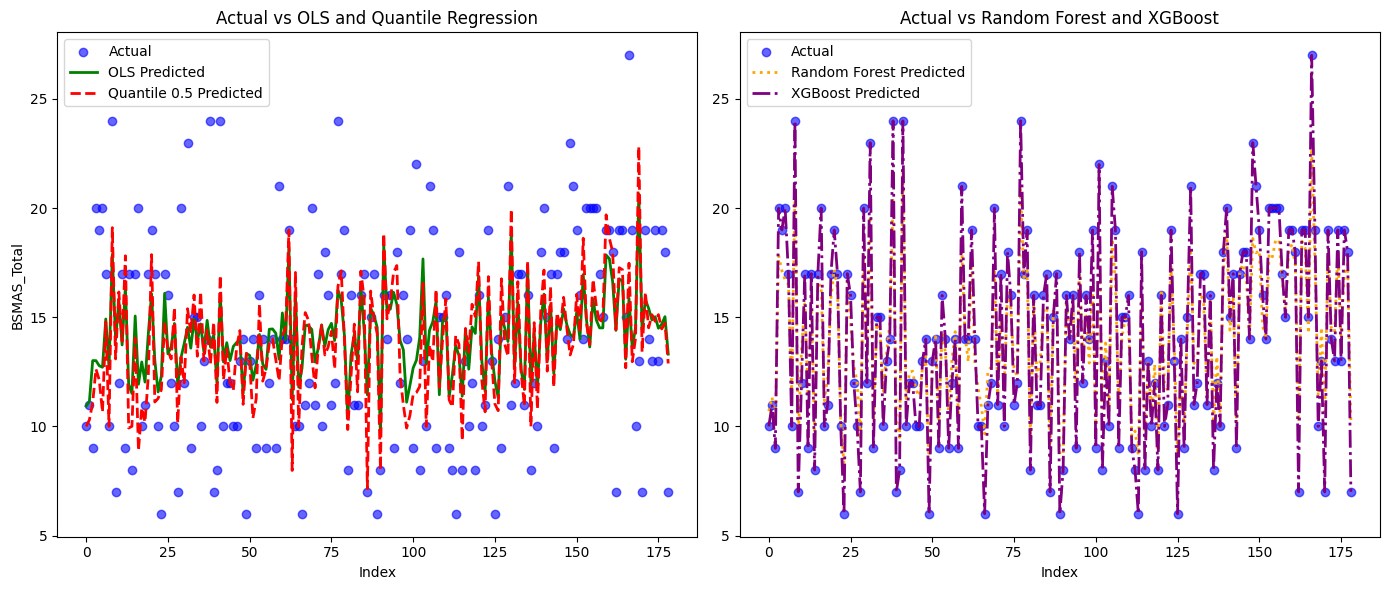

Partial Dependence Plots for Random Forest


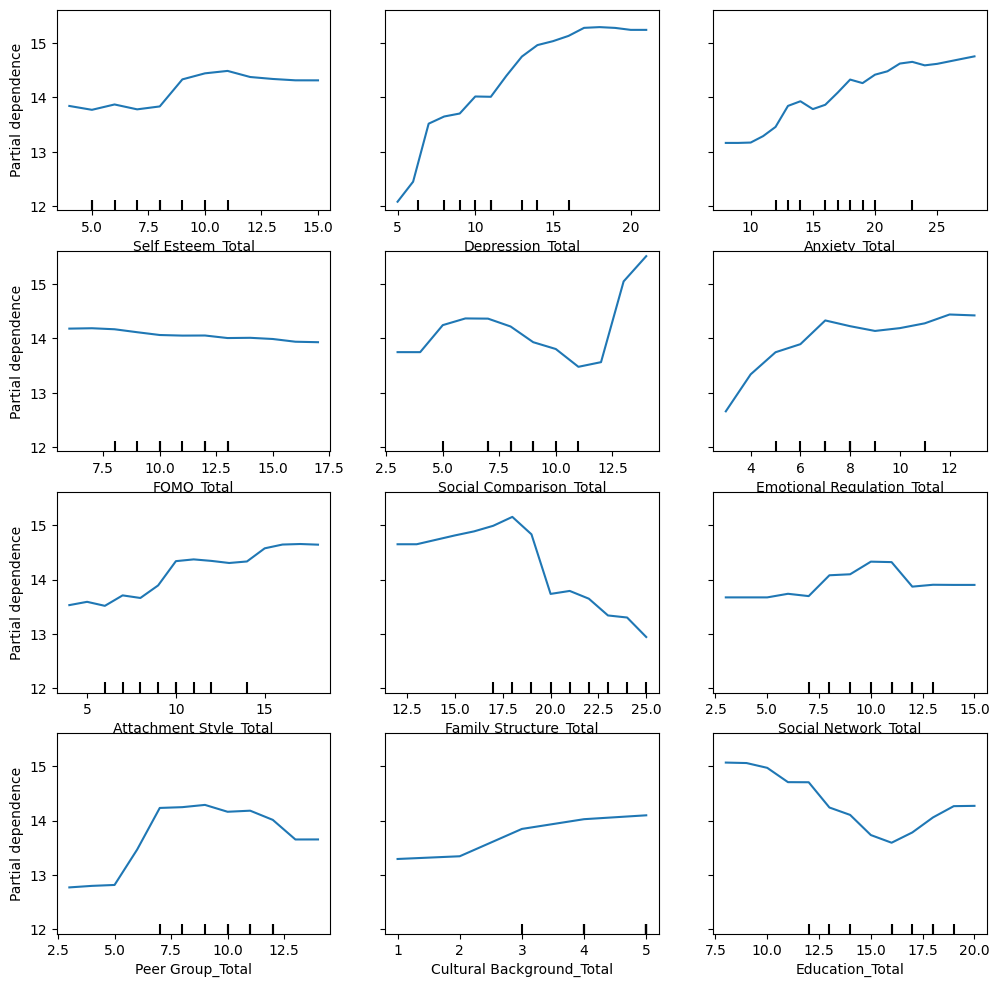

Partial Dependence Plots for XGBoost


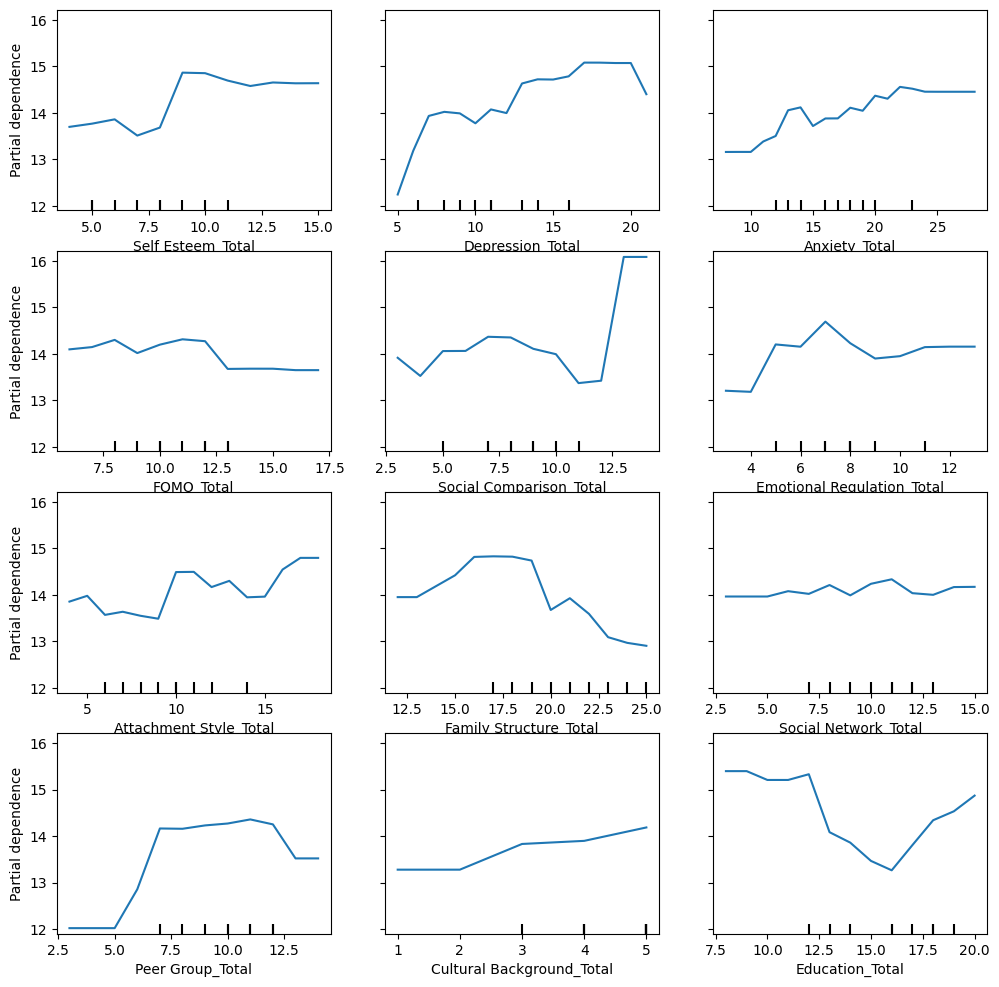

In [ ]:
# Import necessary libraries
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay
import xgboost as xgb
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Function to calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Function to fit and plot OLS, Quantile Regression, Random Forest, and XGBoost
def fit_and_plot_all_models(dependent_var, independent_vars, quantile=0.5):
    X = df[independent_vars]  # Independent variables
    y = df[dependent_var]     # Dependent variable

    # Add constant for OLS and Quantile Regression
    X_ols = sm.add_constant(X)

    # Fit OLS model
    ols_model = sm.OLS(y, X_ols).fit()
    y_pred_ols = ols_model.predict(X_ols)

    # Fit Quantile Regression model
    quant_model = sm.QuantReg(y, X_ols).fit(q=quantile)
    y_pred_quant = quant_model.predict(X_ols)

    # Fit Random Forest model
    rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
    rf_model.fit(X, y)
    y_pred_rf = rf_model.predict(X)

    # Fit XGBoost model
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_estimators=100)
    xgb_model.fit(X, y)
    y_pred_xgb = xgb_model.predict(X)

    # Calculate RMSE and MAPE for each model
    metrics = {
        'Model': ['OLS', 'Quantile Regression', 'Random Forest', 'XGBoost'],
        'RMSE': [
            rmse(y, y_pred_ols),
            rmse(y, y_pred_quant),
            rmse(y, y_pred_rf),
            rmse(y, y_pred_xgb)
        ],
        'MAPE': [
            mean_absolute_percentage_error(y, y_pred_ols),
            mean_absolute_percentage_error(y, y_pred_quant),
            mean_absolute_percentage_error(y, y_pred_rf),
            mean_absolute_percentage_error(y, y_pred_xgb)
        ]
    }

    metrics_df = pd.DataFrame(metrics)

    # Print RMSE and MAPE for each model
    print("\nModel Performance Metrics (RMSE and MAPE):")
    print(metrics_df)

    # Create 1x2 subplots for actual vs predicted
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Plot 1: Actual vs OLS and Quantile
    axes[0].scatter(np.arange(len(y)), y, color='blue', label='Actual', alpha=0.6)
    axes[0].plot(np.arange(len(y)), y_pred_ols, color='green', label='OLS Predicted', linewidth=2)
    axes[0].plot(np.arange(len(y)), y_pred_quant, color='red', linestyle='--', label=f'Quantile {quantile} Predicted', linewidth=2)
    axes[0].set_title('Actual vs OLS and Quantile Regression')
    axes[0].set_xlabel('Index')
    axes[0].set_ylabel(dependent_var)
    axes[0].legend()

    # Plot 2: Actual vs Random Forest and XGBoost
    axes[1].scatter(np.arange(len(y)), y, color='blue', label='Actual', alpha=0.6)
    axes[1].plot(np.arange(len(y)), y_pred_rf, color='orange', linestyle=':', label='Random Forest Predicted', linewidth=2)
    axes[1].plot(np.arange(len(y)), y_pred_xgb, color='purple', linestyle='-.', label='XGBoost Predicted', linewidth=2)
    axes[1].set_title('Actual vs Random Forest and XGBoost')
    axes[1].set_xlabel('Index')
    axes[1].legend()

    # Adjust layout and show plots
    plt.tight_layout()
    plt.show()

    # Partial Dependence Plots for Random Forest
    print('Partial Dependence Plots for Random Forest')
    fig, ax = plt.subplots(figsize=(12, 12))
    PartialDependenceDisplay.from_estimator(rf_model, X, features=independent_vars, ax=ax, grid_resolution=50)
    #plt.title('Partial Dependence Plots for Random Forest')
    plt.show()

    # Partial Dependence Plots for XGBoost
    print('Partial Dependence Plots for XGBoost')
    fig, ax = plt.subplots(figsize=(12,12))
    PartialDependenceDisplay.from_estimator(xgb_model, X, features=independent_vars, ax=ax, grid_resolution=50)
    #plt.title('Partial Dependence Plots for XGBoost')
    plt.show()

# Define dependent and independent variables
dependent_var = 'BSMAS_Total'
independent_vars = [
    'Self Esteem_Total', 'Depression_Total', 'Anxiety_Total', 'FOMO_Total',
    'Social Comparison_Total', 'Emotional Regulation_Total', 'Attachment Style_Total',
    'Family Structure_Total', 'Social Network_Total', 'Peer Group_Total',
    'Cultural Background_Total', 'Education_Total'
]

# Fit and plot OLS, Quantile, Random Forest, and XGBoost using all independent variables
fit_and_plot_all_models(dependent_var, independent_vars)


In [ ]:
X = df[independent_vars]
y = df[dependent_var]

# Fit Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X, y)

# Fit XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_estimators=100)
xgb_model.fit(X, y)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

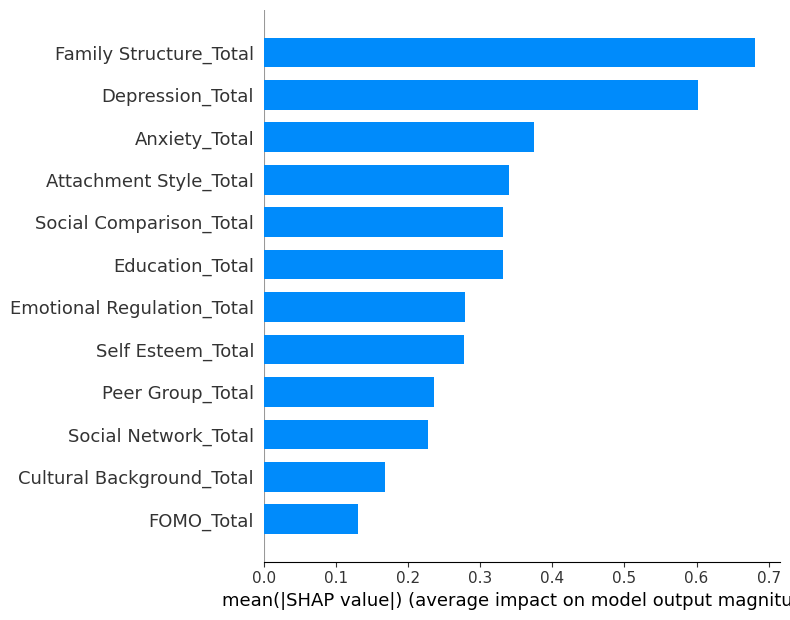

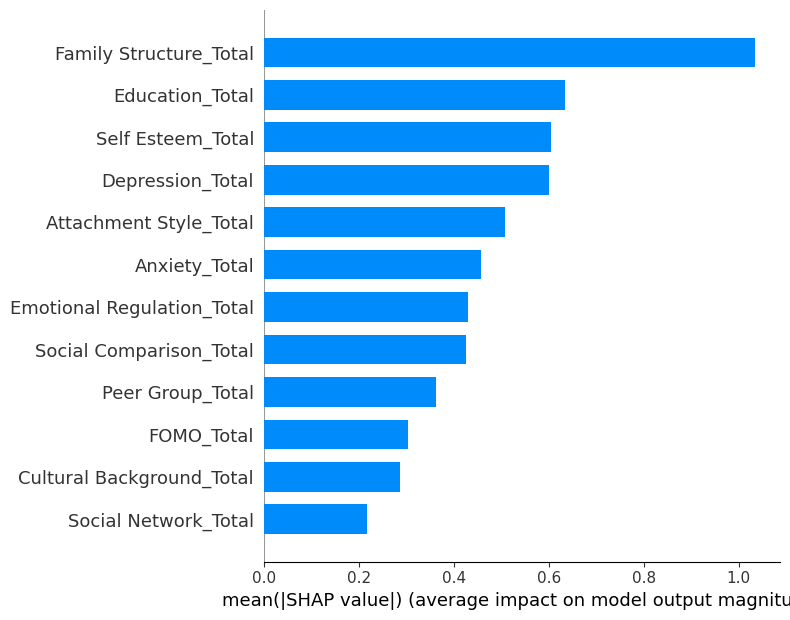

In [ ]:
import shap
def plot_shap_values(model, X, title):
    explainer = shap.TreeExplainer(model)  # Use TreeExplainer for tree-based models
    shap_values = explainer.shap_values(X)

    # Summary plot
    shap.summary_plot(shap_values, X, plot_type="bar", title=title)

# Generate SHAP plots for Random Forest and XGBoost
plot_shap_values(rf_model, X, 'SHAP Values for Random Forest')
plot_shap_values(xgb_model, X, 'SHAP Values for XGBoost')


In [ ]:
!pip install lime

from lime.lime_tabular import LimeTabularExplainer

def plot_lime_explanation(model, X, index, model_name):
    explainer = LimeTabularExplainer(X.values, mode='regression', feature_names=X.columns.tolist(),
                                      class_names=['Target'], verbose=True, random_state=42)

    # Explain the prediction for the instance at `index`
    exp = explainer.explain_instance(X.values[index], model.predict, num_features=10)
    exp.show_in_notebook(show_table=True, show_all=False)

# Choose an instance index to explain
index_to_explain = 10  # You can change this index for different predictions

# Generate LIME explanations for Random Forest and XGBoost
plot_lime_explanation(rf_model, X, index_to_explain, 'Random Forest')
plot_lime_explanation(xgb_model, X, index_to_explain, 'XGBoost')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=bf65fe1bbe1d482d25223eeb57c927347425a4ff3598e50b581a420dddd9a99a
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime
Intercept 13.330814220131689
Prediction_local [15.31822009]
Right: 13.5


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 12.92128617682478
Prediction_local [15.16988887]
Right: 12.001096


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import xgboost as xgb

# Assuming df is your DataFrame and you have defined independent_vars and dependent_var
X = df[independent_vars]
y = df[dependent_var]

# Initialize KFold for cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Fit Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Use cross_val_predict to get predictions
rf_predictions = cross_val_predict(rf_model, X, y, cv=kf)

# Calculate RMSE for Random Forest
rf_rmse = np.sqrt(mean_squared_error(y, rf_predictions))

# Calculate MAPE for Random Forest
rf_mape = mean_absolute_percentage_error(y, rf_predictions) * 100  # Multiply by 100 for percentage

# Print RMSE and MAPE for Random Forest
print("Random Forest RMSE:", rf_rmse)
print("Random Forest MAPE:", rf_mape)

# Fit XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_estimators=100)

# Use cross_val_predict to get predictions for XGBoost
xgb_predictions = cross_val_predict(xgb_model, X, y, cv=kf)

# Calculate RMSE for XGBoost
xgb_rmse = np.sqrt(mean_squared_error(y, xgb_predictions))

# Calculate MAPE for XGBoost
xgb_mape = mean_absolute_percentage_error(y, xgb_predictions) * 100  # Multiply by 100 for percentage

# Print RMSE and MAPE for XGBoost
print("XGBoost RMSE:", xgb_rmse)
print("XGBoost MAPE:", xgb_mape)


Random Forest RMSE: 4.614965817555608
Random Forest MAPE: 32.28200698805057
XGBoost RMSE: 4.709367082940366
XGBoost MAPE: 33.03829989986049


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import xgboost as xgb

# Assuming df is your DataFrame and you have defined independent_vars and dependent_var
X = df[independent_vars]
y = df[dependent_var]

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Random Forest model on the training set
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predict on training and testing sets
rf_train_predictions = rf_model.predict(X_train)
rf_test_predictions = rf_model.predict(X_test)

# Calculate RMSE and MAPE for Random Forest
rf_train_rmse = np.sqrt(mean_squared_error(y_train, rf_train_predictions))
rf_test_rmse = np.sqrt(mean_squared_error(y_test, rf_test_predictions))

rf_train_mape = mean_absolute_percentage_error(y_train, rf_train_predictions) * 100
rf_test_mape = mean_absolute_percentage_error(y_test, rf_test_predictions) * 100

# Print RMSE and MAPE for Random Forest
print("Random Forest Train RMSE:", rf_train_rmse)
print("Random Forest Test RMSE:", rf_test_rmse)
print("Random Forest Train MAPE:", rf_train_mape)
print("Random Forest Test MAPE:", rf_test_mape)

# Fit XGBoost model on the training set
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_estimators=100)
xgb_model.fit(X_train, y_train)

# Predict on training and testing sets
xgb_train_predictions = xgb_model.predict(X_train)
xgb_test_predictions = xgb_model.predict(X_test)

# Calculate RMSE and MAPE for XGBoost
xgb_train_rmse = np.sqrt(mean_squared_error(y_train, xgb_train_predictions))
xgb_test_rmse = np.sqrt(mean_squared_error(y_test, xgb_test_predictions))

xgb_train_mape = mean_absolute_percentage_error(y_train, xgb_train_predictions) * 100
xgb_test_mape = mean_absolute_percentage_error(y_test, xgb_test_predictions) * 100

# Print RMSE and MAPE for XGBoost
print("XGBoost Train RMSE:", xgb_train_rmse)
print("XGBoost Test RMSE:", xgb_test_rmse)
print("XGBoost Train MAPE:", xgb_train_mape)
print("XGBoost Test MAPE:", xgb_test_mape)


Random Forest Train RMSE: 1.7047123088498117
Random Forest Test RMSE: 4.401654991780553
Random Forest Train MAPE: 11.859980773934394
Random Forest Test MAPE: 34.629937055453055
XGBoost Train RMSE: 0.0011049274032330194
XGBoost Test RMSE: 5.0599334557977835
XGBoost Train MAPE: 0.005413066915831175
XGBoost Test MAPE: 36.919449573705705


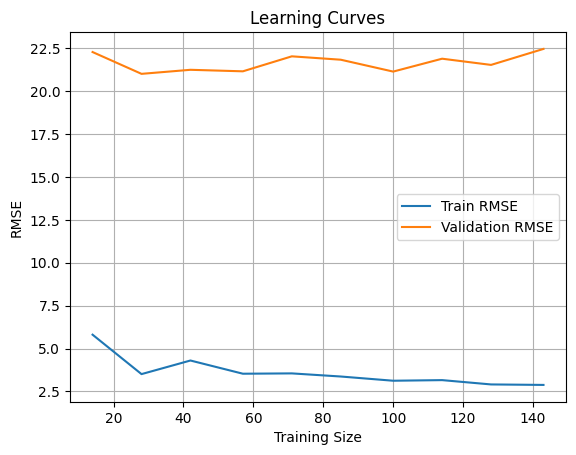

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1,
                                                            train_sizes=np.linspace(0.1, 1.0, 10),
                                                            scoring='neg_mean_squared_error')

    train_scores_mean = -train_scores.mean(axis=1)
    test_scores_mean = -test_scores.mean(axis=1)

    plt.figure()
    plt.plot(train_sizes, train_scores_mean, label='Train RMSE')
    plt.plot(train_sizes, test_scores_mean, label='Validation RMSE')
    plt.title('Learning Curves')
    plt.xlabel('Training Size')
    plt.ylabel('RMSE')
    plt.legend()
    plt.grid()
    plt.show()

# Example usage for Random Forest
plot_learning_curve(rf_model, X, y)


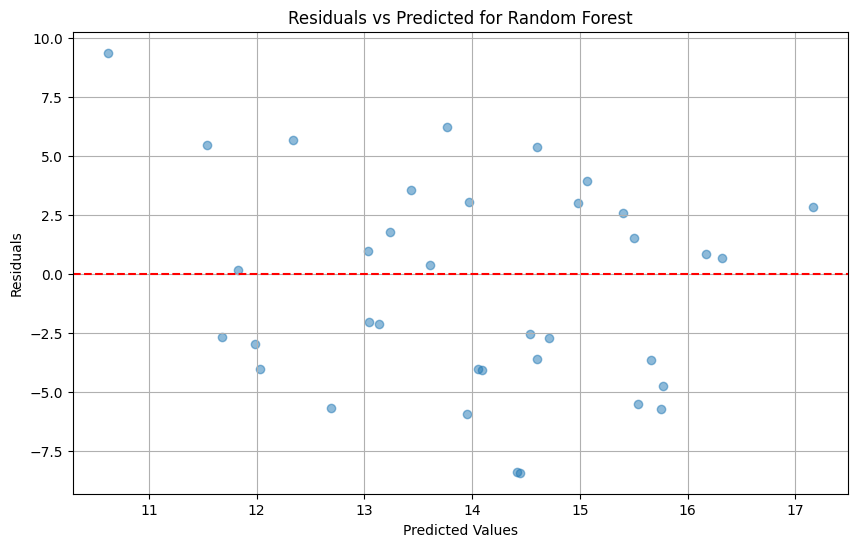

In [ ]:
# Residuals for Random Forest
rf_residuals = y_test - rf_test_predictions

plt.figure(figsize=(10, 6))
plt.scatter(rf_test_predictions, rf_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted for Random Forest')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search for Random Forest
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best cross-validation score (MSE):", -grid_search_rf.best_score_)


Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best cross-validation score (MSE): 20.0739976991368


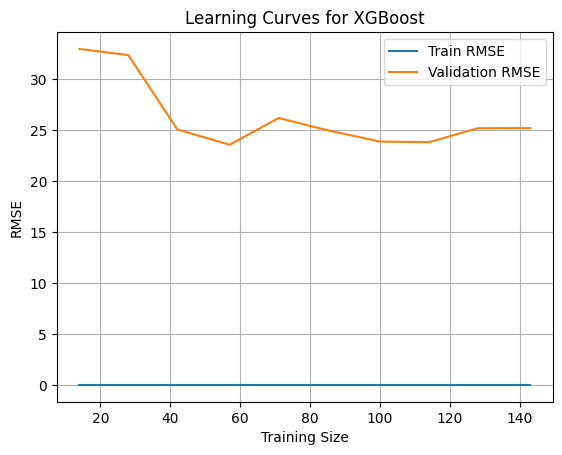

In [ ]:
from sklearn.model_selection import learning_curve

def plot_learning_curve_xgb(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1,
                                                            train_sizes=np.linspace(0.1, 1.0, 10),
                                                            scoring='neg_mean_squared_error')

    train_scores_mean = -train_scores.mean(axis=1)
    test_scores_mean = -test_scores.mean(axis=1)

    plt.figure()
    plt.plot(train_sizes, train_scores_mean, label='Train RMSE')
    plt.plot(train_sizes, test_scores_mean, label='Validation RMSE')
    plt.title('Learning Curves for XGBoost')
    plt.xlabel('Training Size')
    plt.ylabel('RMSE')
    plt.legend()
    plt.grid()
    plt.show()

# Example usage for XGBoost
plot_learning_curve_xgb(xgb_model, X, y)


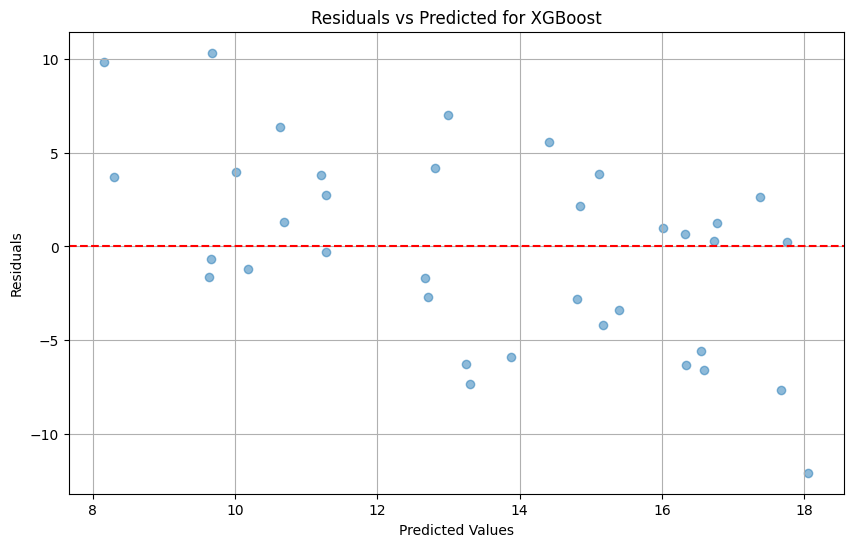

In [ ]:
# Residuals for XGBoost
xgb_residuals = y_test - xgb_test_predictions

plt.figure(figsize=(10, 6))
plt.scatter(xgb_test_predictions, xgb_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted for XGBoost')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}

# Perform Grid Search for XGBoost
grid_search_xgb = GridSearchCV(xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
                                param_grid_xgb, cv=5, scoring='neg_mean_squared_error')
grid_search_xgb.fit(X_train, y_train)

print("Best parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best cross-validation score (MSE):", -grid_search_xgb.best_score_)


Best parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Best cross-validation score (MSE): 19.586036023084137
